
# Исследование свойств характеристик случайных графов


Мы рассматриваем два распределения:
- Exp(λ=1)
- Γ(½, λ=√½)

будем использовать два графа и две характеристики:
- KNN-граф: число треугольников
- DIST-граф: хроматическое число


## KNN - граф. Перебираем значение параметра K для KNN и размер выборки.

для начала подключим все библиотеки

In [1]:
import numpy as np
import networkx as nx
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ks_2samp
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd


Затем создадим выборки и построим требуемый KNN-граф

In [2]:
def sample_exp(n, lam):
    return np.random.exponential(1 / lam, n)

def sample_gamma(n, shape, lam):
    return np.random.gamma(shape, 1 / lam, n)

def build_knn_graph(X, k):
    nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X.reshape(-1, 1))
    distances, indices = nbrs.kneighbors(X.reshape(-1, 1))
    G = nx.Graph()
    n = len(X)
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in indices[i][1:]:
            G.add_edge(i, j)
    return G

Затем создадим считалку треугольников и базовую функцию Монте-Карло которая будет повторять эксперимент

In [3]:

def count_triangles(G):
    return sum(nx.triangles(G).values()) // 3

def monte_carlo_characteristic(sample_func, graph_func, char_func, *sample_args, n_sim=300, n=1000):
    results = []
    for _ in range(n_sim):
        X = sample_func(n, *sample_args)
        G = graph_func(X)
        T = char_func(G)
        results.append(T)
    return np.array(results)

А теперь то ради чего мы и собрались: сам огромный анализирующий кусок. Он делает перебор по K, выводит 5 основных числовых характеристик и рисует графики.

==== Анализ для n = 100, k=2 ====


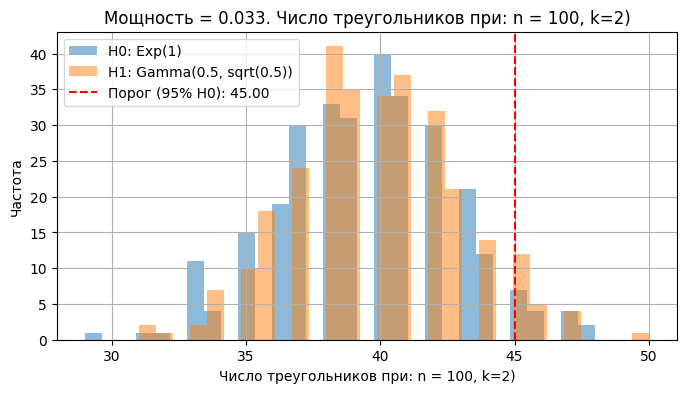

==== Анализ для n = 100, k=5 ====


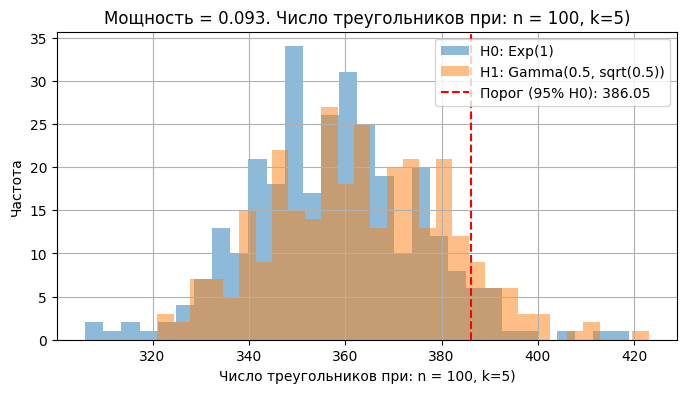

==== Анализ для n = 100, k=10 ====


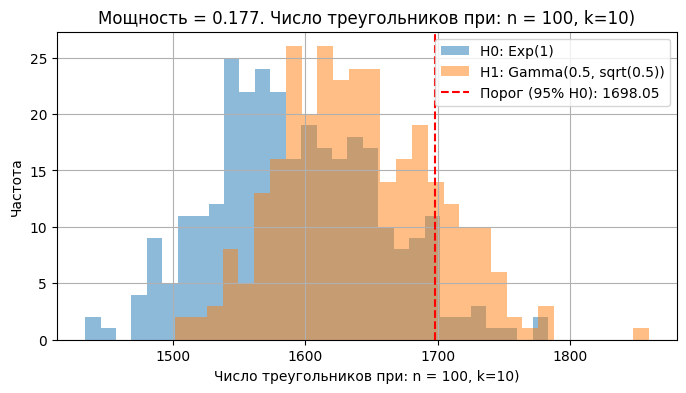

==== Анализ для n = 100, k=20 ====


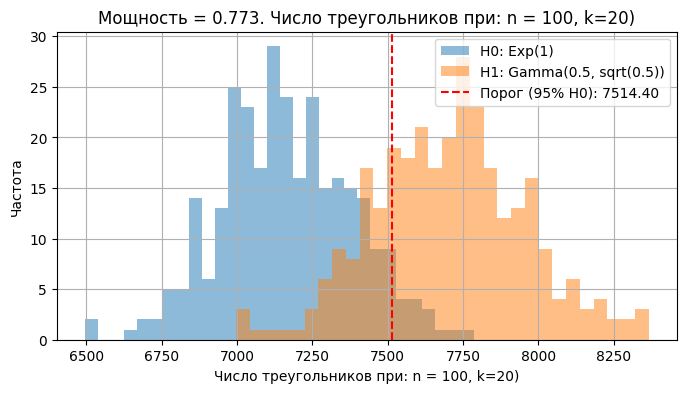

==== Анализ для n = 100, k=30 ====


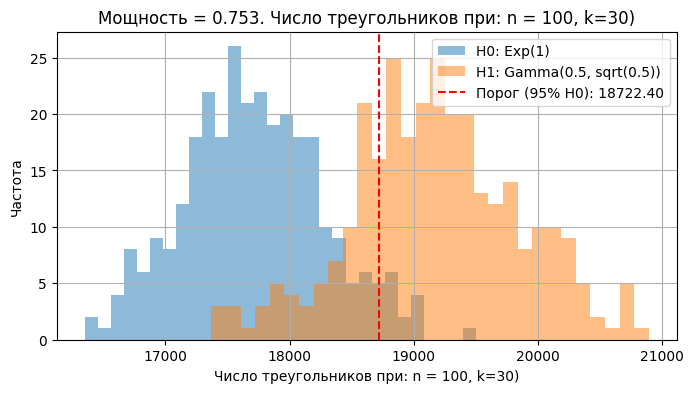

==== Анализ для n = 100, k=40 ====


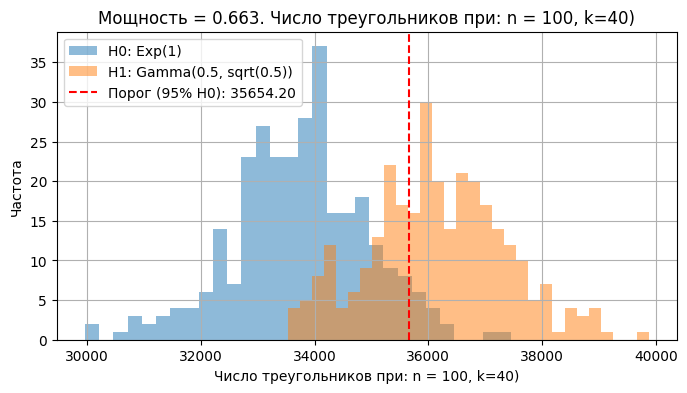

==== Анализ для n = 100, k=50 ====


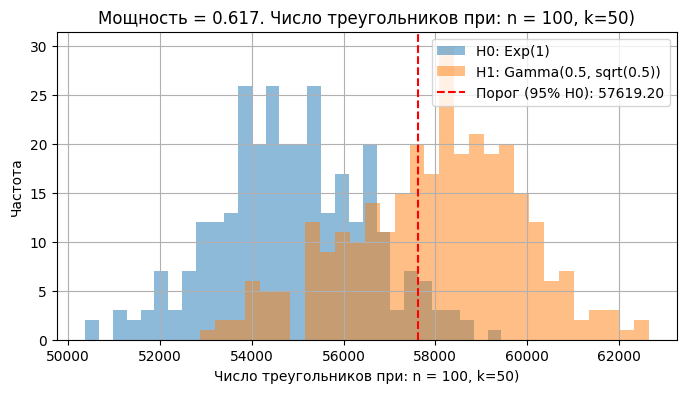

==== Анализ для n = 100, k=60 ====


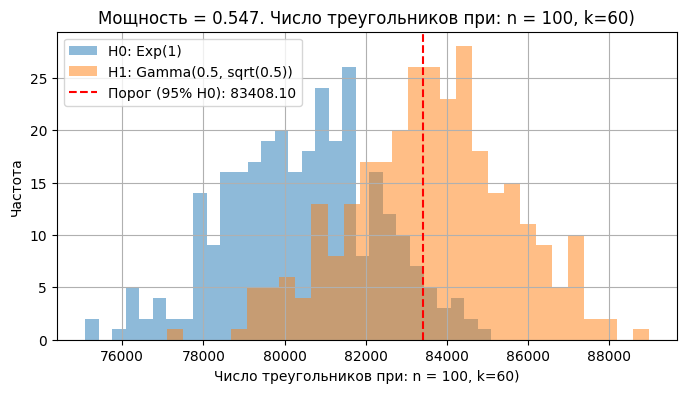

==== Анализ для n = 100, k=70 ====


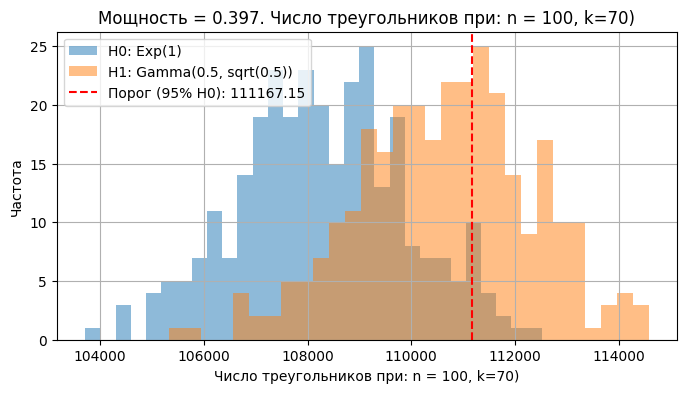

==== Анализ для n = 100, k=80 ====


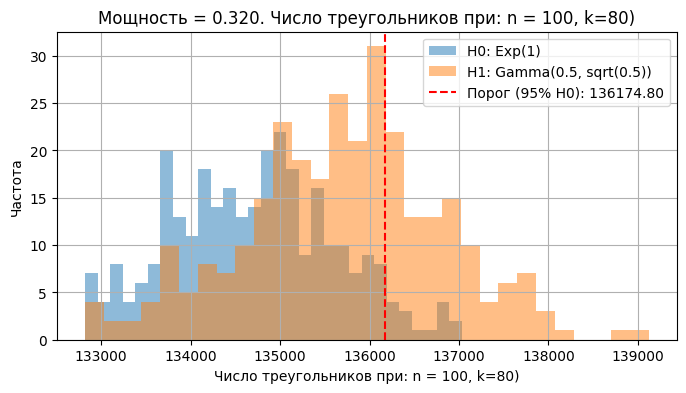

==== Анализ для n = 100, k=90 ====


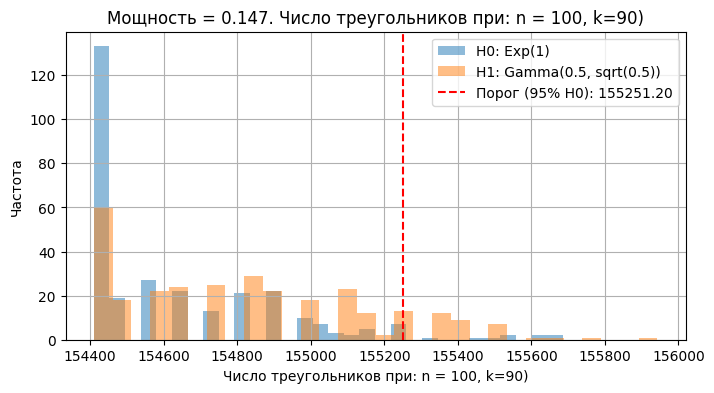

==== Анализ для n = 200, k=2 ====


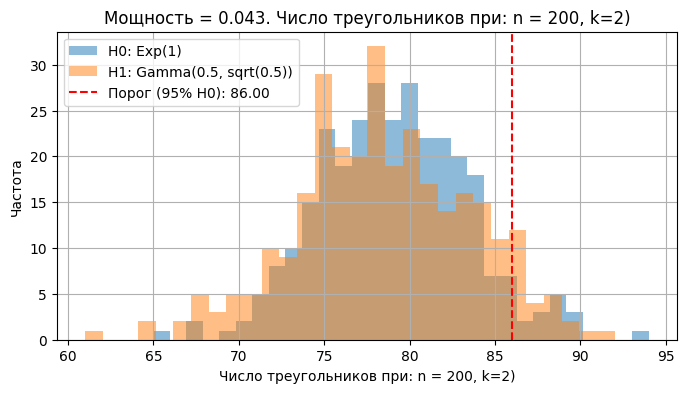

==== Анализ для n = 200, k=5 ====


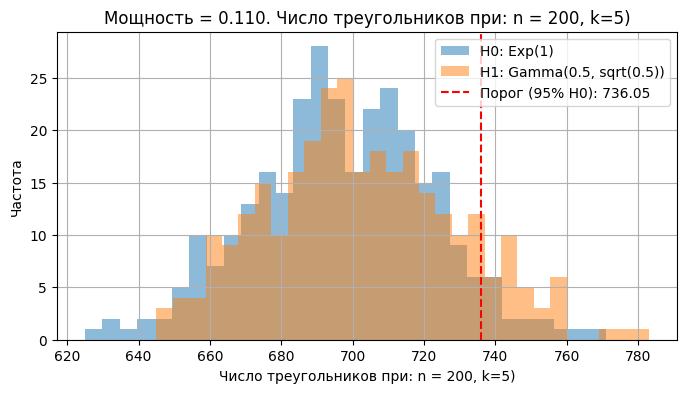

==== Анализ для n = 200, k=10 ====


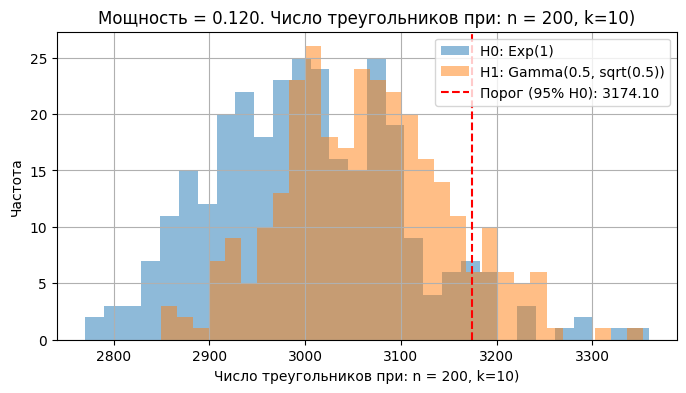

==== Анализ для n = 200, k=20 ====


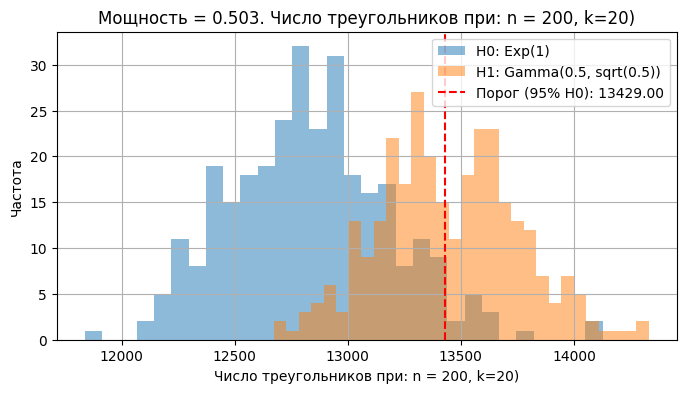

==== Анализ для n = 200, k=30 ====


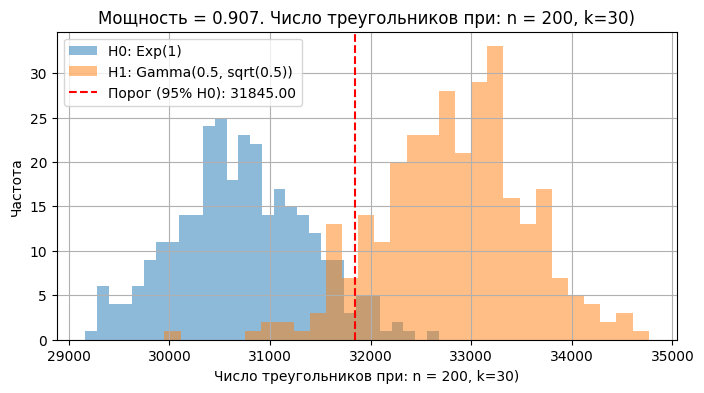

==== Анализ для n = 200, k=40 ====


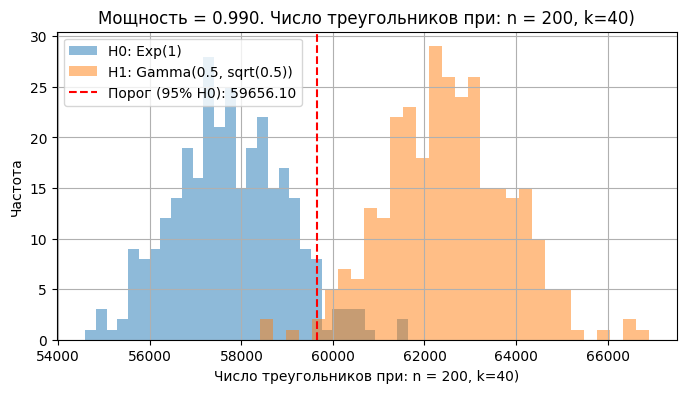

==== Анализ для n = 200, k=50 ====


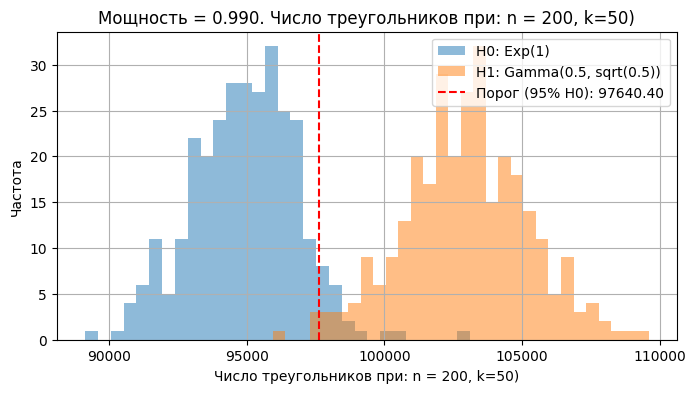

==== Анализ для n = 200, k=60 ====


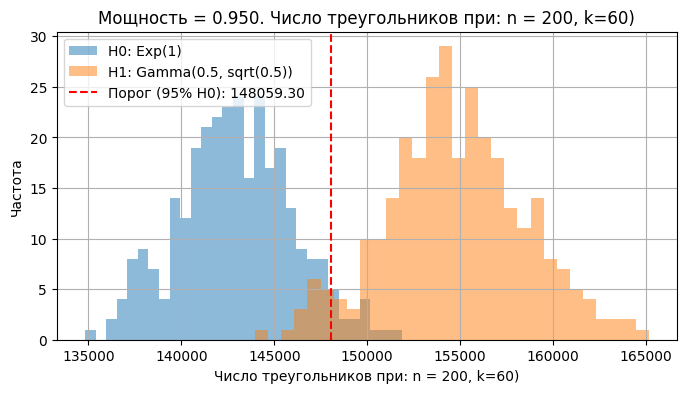

==== Анализ для n = 200, k=70 ====


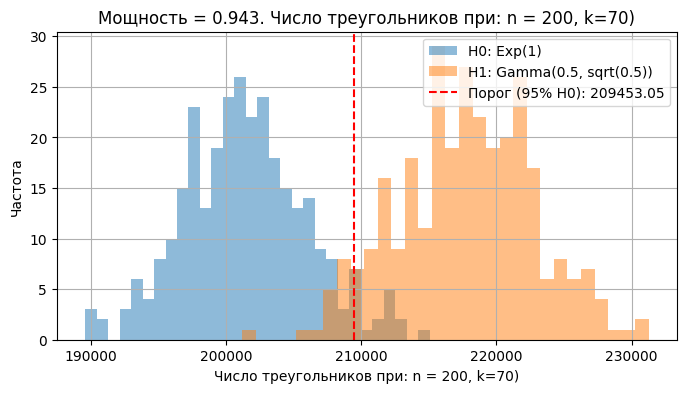

==== Анализ для n = 200, k=80 ====


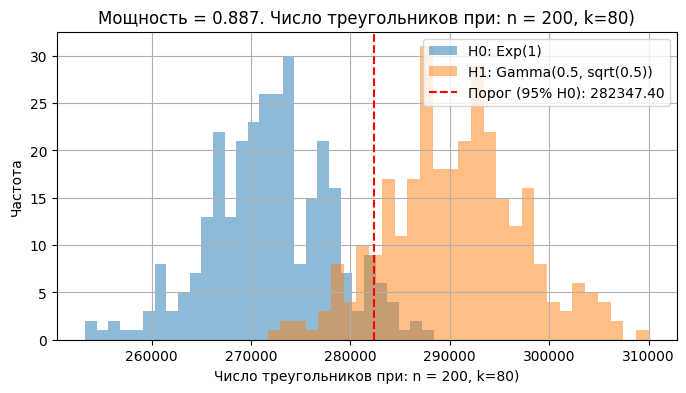

==== Анализ для n = 200, k=90 ====


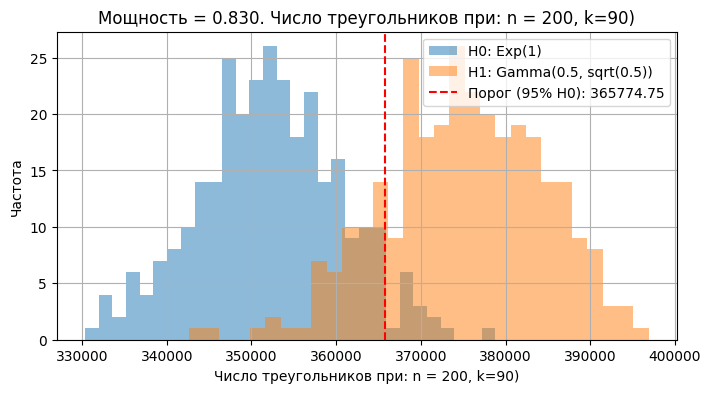

==== Анализ для n = 500, k=2 ====


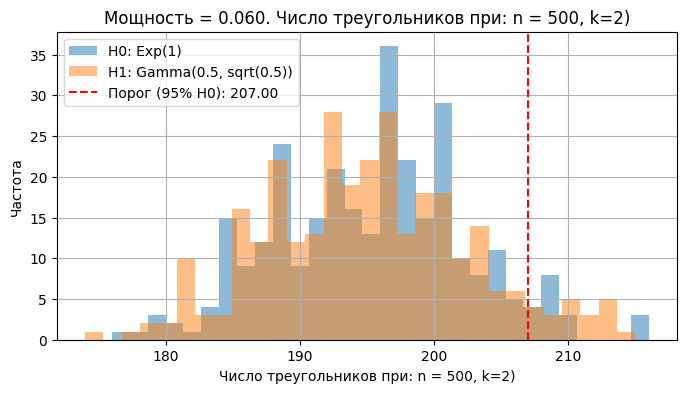

==== Анализ для n = 500, k=5 ====


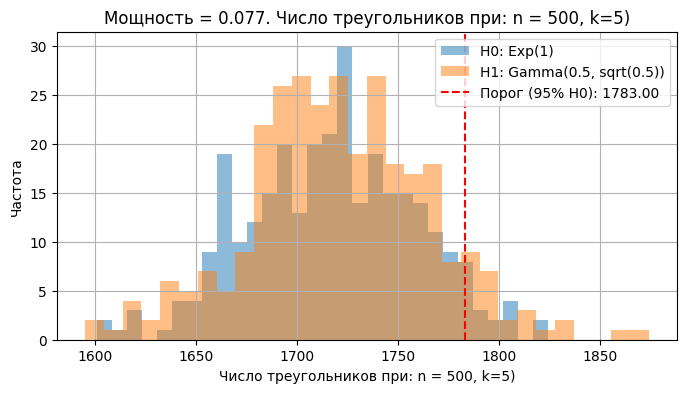

==== Анализ для n = 500, k=10 ====


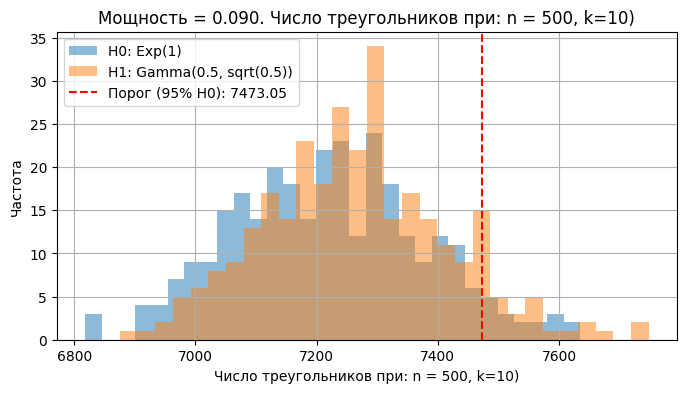

==== Анализ для n = 500, k=20 ====


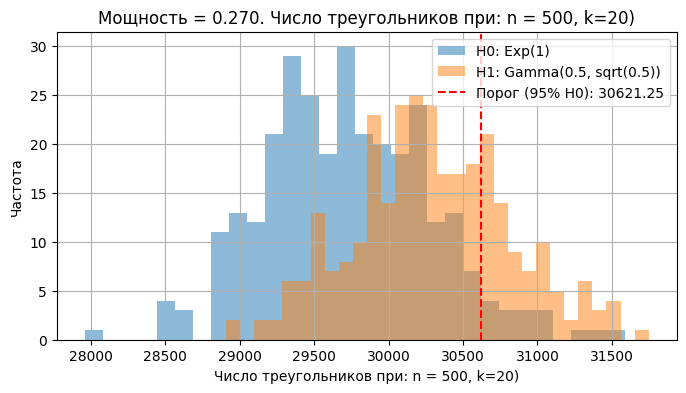

==== Анализ для n = 500, k=30 ====


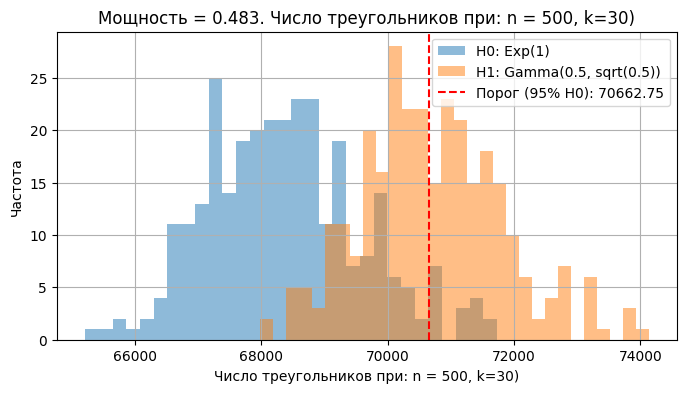

==== Анализ для n = 500, k=40 ====


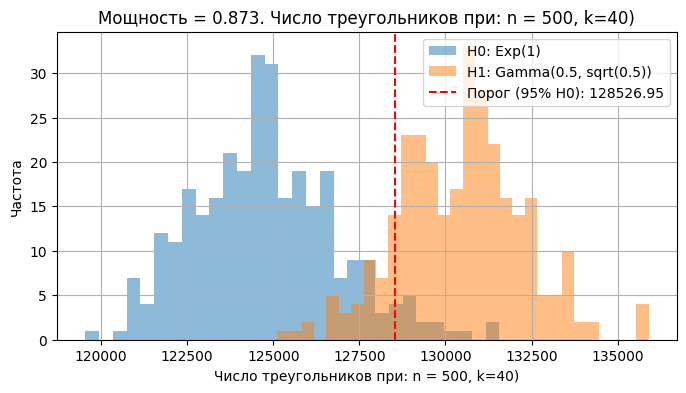

==== Анализ для n = 500, k=50 ====


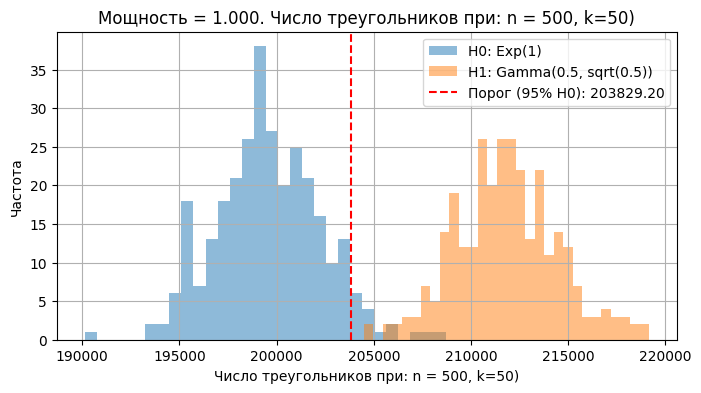

==== Анализ для n = 500, k=60 ====


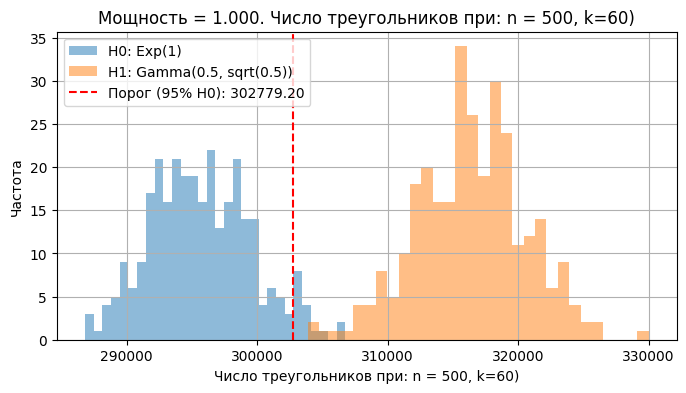

==== Анализ для n = 500, k=70 ====


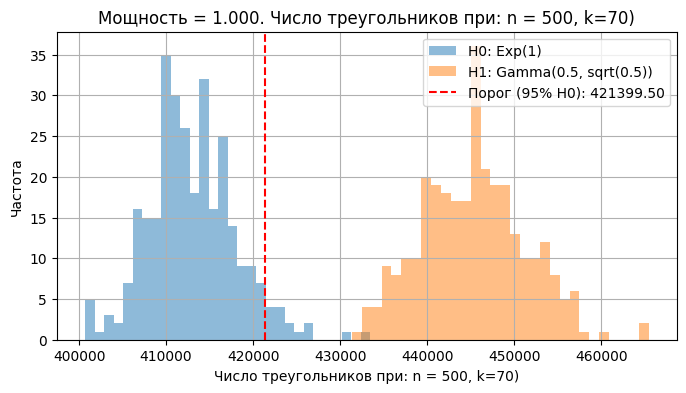

==== Анализ для n = 500, k=80 ====


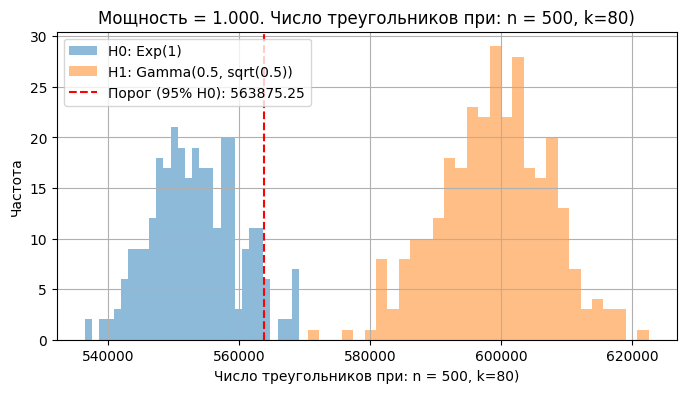

==== Анализ для n = 500, k=90 ====


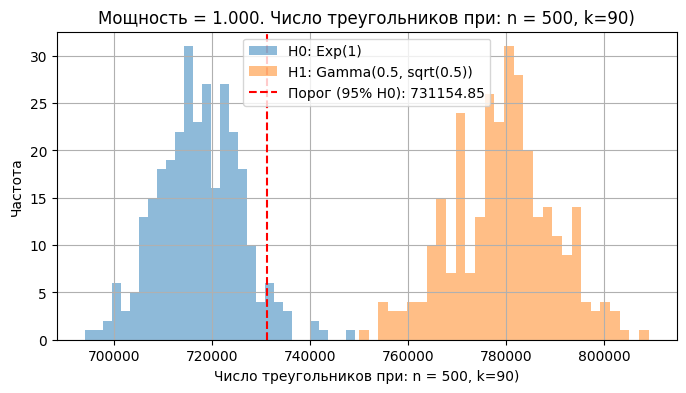

==== Анализ для n = 1000, k=2 ====


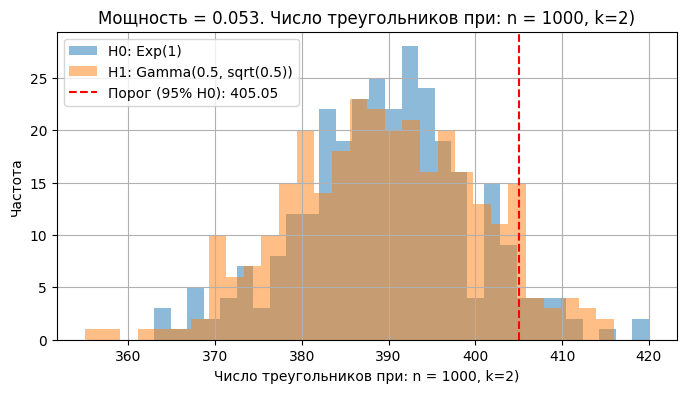

==== Анализ для n = 1000, k=5 ====


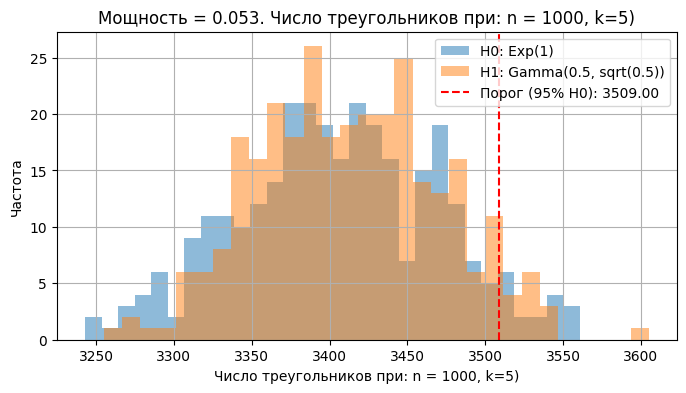

==== Анализ для n = 1000, k=10 ====


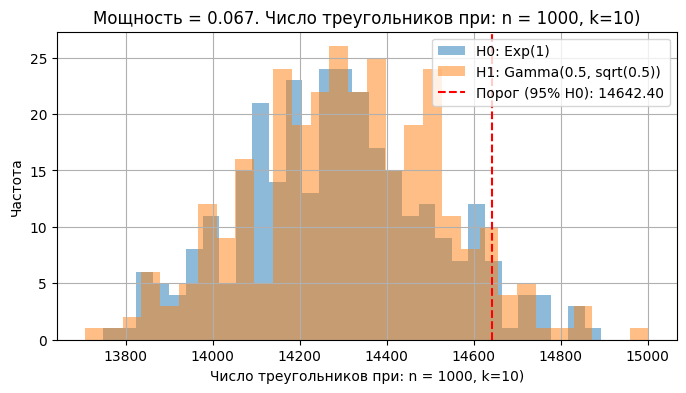

==== Анализ для n = 1000, k=20 ====


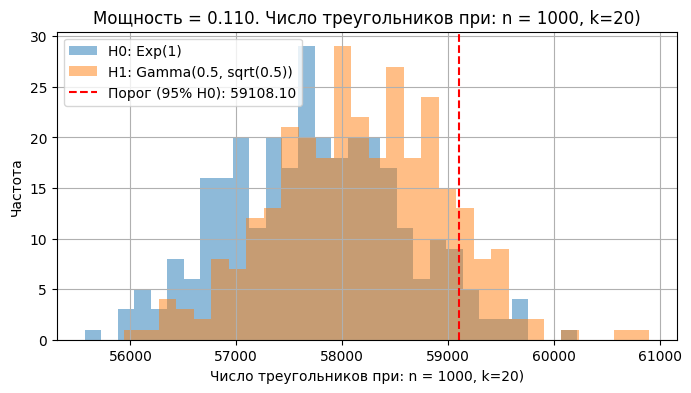

==== Анализ для n = 1000, k=30 ====


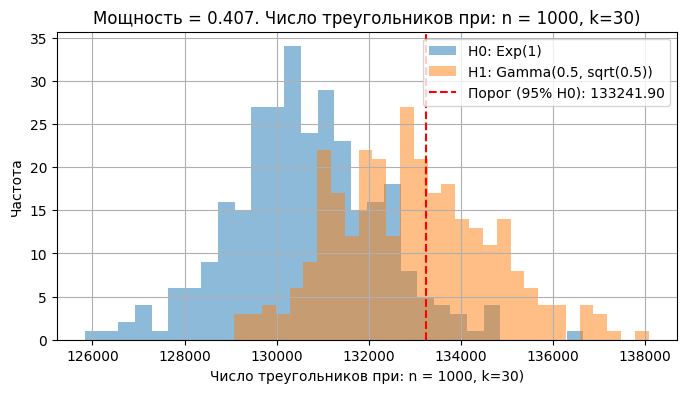

==== Анализ для n = 1000, k=40 ====


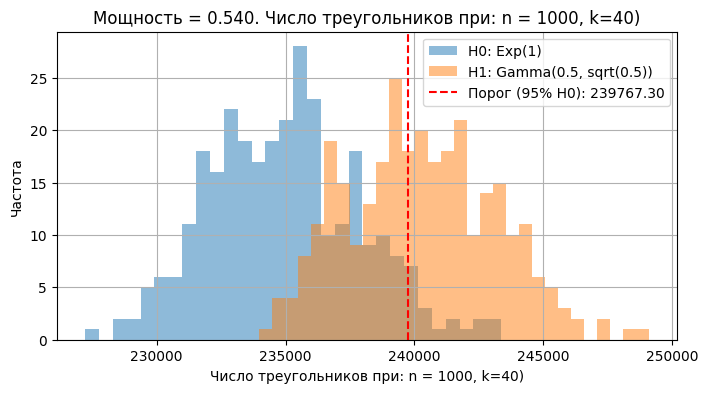

==== Анализ для n = 1000, k=50 ====


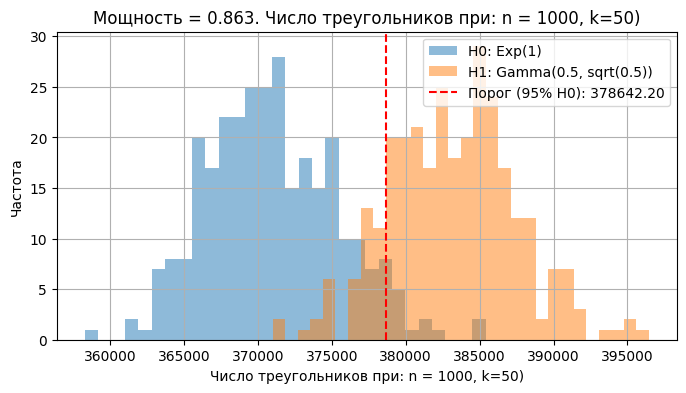

==== Анализ для n = 1000, k=60 ====


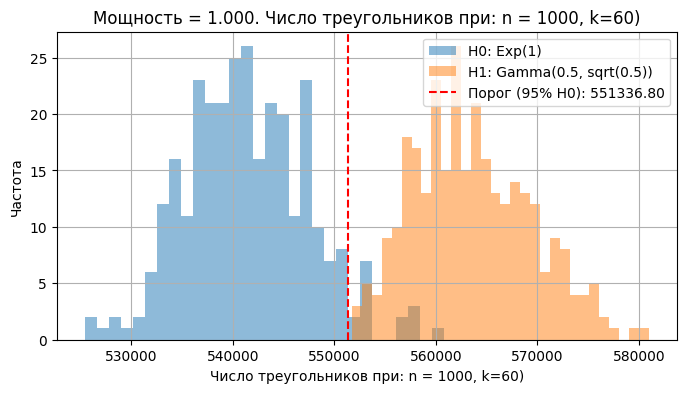

==== Анализ для n = 1000, k=70 ====


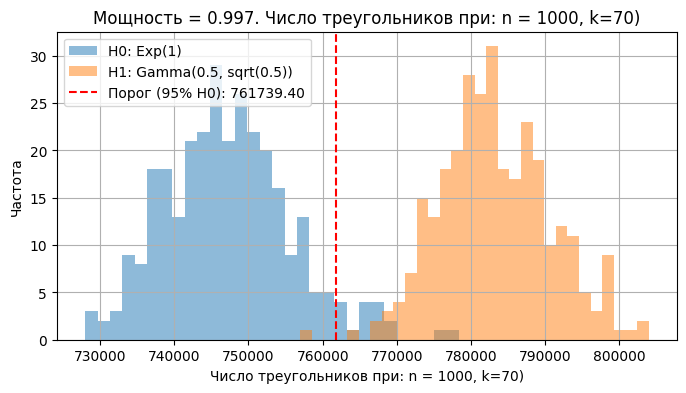

==== Анализ для n = 1000, k=80 ====


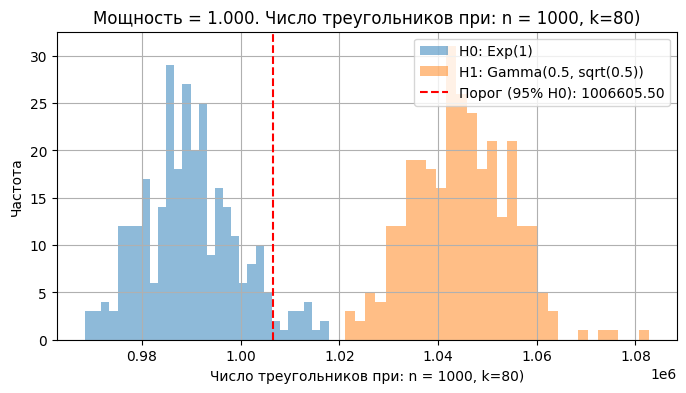

==== Анализ для n = 1000, k=90 ====


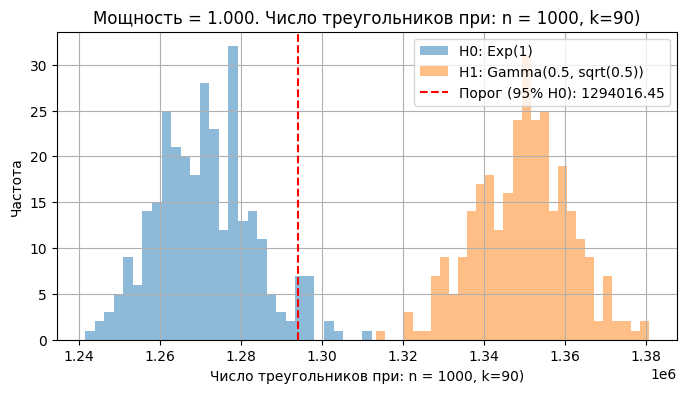

In [4]:

summary_results = []

def analyze_characteristic(T_H0, T_H1, char_name="", k=None, lambda_H0=1, lambda_H1 = 0.5):

    y_true = np.array([0] * len(T_H0) + [1] * len(T_H1))
    y_scores = np.concatenate([T_H0, T_H1])
    auc_score = roc_auc_score(y_true, y_scores)
    threshold = np.percentile(T_H0, 95)
    type_1_error = np.mean(T_H0 > threshold)
    power = np.mean(T_H1 > threshold)

    plt.figure(figsize=(8, 4))
    plt.hist(T_H0, bins=30, alpha=0.5, label='H0: Exp(1)')
    plt.hist(T_H1, bins=30, alpha=0.5, label='H1: Gamma(0.5, sqrt(0.5))')
    plt.axvline(threshold, color='red', linestyle='--', label=f'Порог (95% H0): {threshold:.2f}')
    plt.title(f"Мощность = {power:.3f}. {char_name}")
    plt.xlabel(f'{char_name}')
    plt.ylabel('Частота')
    plt.legend()
    plt.grid()
    plt.show()


    summary_results.append({
        'n': n,
        'k': k,
        'AUC ROC': auc_score,
        'Threshold (95% H0)': threshold,
        'Type I Error (H0)': type_1_error,
        'Power (H1)': power
    })



n_sim = 300

k_values = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]
n_values = [100, 200, 500, 1000]
for n in n_values:
    for k in k_values:
        print(f"==== Анализ для n = {n}, k={k} ====")
        T_knn_H0 = monte_carlo_characteristic(sample_exp, lambda X: build_knn_graph(X, k), count_triangles, 1, n=n, n_sim=n_sim)
        T_knn_H1 = monte_carlo_characteristic(sample_gamma, lambda X: build_knn_graph(X, k), count_triangles, 0.5, np.sqrt(0.5), n=n, n_sim=n_sim)
        analyze_characteristic(T_knn_H0, T_knn_H1, char_name=f"Число треугольников при: n = {n}, k={k})", k=k)


Теперь выведем табличку со всеми критериями и значениями.

In [5]:
from IPython.display import display
summary_df = pd.DataFrame(summary_results)
display(summary_df)


n   k   AUC ROC  Threshold (95% H0)  Type I Error (H0)  Power (H1)
0    100   2  0.530822               45.00           0.033333    0.033333
1    100   5  0.581628              386.05           0.050000    0.093333
2    100  10  0.708722             1698.05           0.050000    0.176667
3    100  20  0.946294             7514.40           0.050000    0.773333
4    100  30  0.947722            18722.40           0.050000    0.753333
5    100  40  0.926628            35654.20           0.050000    0.663333
6    100  50  0.892283            57619.20           0.050000    0.616667
7    100  60  0.875828            83408.10           0.050000    0.546667
8    100  70  0.842250           111167.15           0.050000    0.396667
9    100  80  0.756944           136174.80           0.050000    0.320000
10   100  90  0.666100           155251.20           0.050000    0.146667
11   200   2  0.463083               86.00           0.046667    0.043333
12   200   5  0.552894              736.05           0.050000    0.110000
13   200  10  0.684128             3174.10           0.050000    0.120000
14   200  20  0.902339            13429.00           0.046667    0.503333
15   200  30  0.980878            31845.00           0.050000    0.906667
16   200  40  0.994511            59656.10           0.050000    0.990000
17   200  50  0.995767            97640.40           0.050000    0.990000
18   200  60  0.992450           148059.30           0.050000    0.950000
19   200  70  0.990300           209453.05           0.050000    0.943333
20   200  80  0.980156           282347.40           0.050000    0.886667
21   200  90  0.961439           365774.75           0.050000    0.830000
22   500   2  0.486317              207.00           0.046667    0.060000
23   500   5  0.524589             1783.00           0.046667    0.076667
24   500  10  0.579867             7473.05           0.050000    0.090000
25   500  20  0.770306            30621.25           0.050000    0.270000
26   500  30  0.918372            70662.75           0.050000    0.483333
27   500  40  0.975700           128526.95           0.050000    0.873333
28   500  50  0.999178           203829.20           0.050000    1.000000
29   500  60  0.999822           302779.20           0.050000    1.000000
30   500  70  0.999956           421399.50           0.050000    1.000000
31   500  80  1.000000           563875.25           0.050000    1.000000
32   500  90  1.000000           731154.85           0.050000    1.000000
33  1000   2  0.492739              405.05           0.050000    0.053333
34  1000   5  0.532289             3509.00           0.046667    0.053333
35  1000  10  0.539617            14642.40           0.050000    0.066667
36  1000  20  0.649000            59108.10           0.050000    0.110000
37  1000  30  0.839056           133241.90           0.050000    0.406667
38  1000  40  0.902694           239767.30           0.050000    0.540000
39  1000  50  0.974561           378642.20           0.050000    0.863333
40  1000  60  0.995744           551336.80           0.050000    1.000000
41  1000  70  0.997956           761739.40           0.050000    0.996667
42  1000  80  1.000000          1006605.50           0.050000    1.000000
43  1000  90  1.000000          1294016.45           0.050000    1.000000

## Вывод по результатам анализа

### Разделимость H0 и H1
- При любом размере выборки выводы будут схожи, оказалось, если выборка не мала, то ее размер особо не влияет, параметр `k` гораздно важнее
- При `k ≤ 10` — AUC ROC ≈ 0.5, различия между H0 и H1 незначимы.
- При `k ≥ 20` — AUC ROC начинает расти, при `k=40` достигает почти идеального результата.
- При `k ≥ 60` — AUC ROC ≈ 1.0, полное разделение, отличная работа.

### Ошибка 1 рода и мощность
- При всех `k` ошибка 1 рода ≈ 0.05 (контроль α).
- Мощность растёт с увеличением `k`.
  - При `k=40` — мощность ≈ 0.84.
  - При `k ≥ 60` — мощность ≈ 1.0.

### Итог
- Характеристика эффективна при `k ≥ 40`.
- При `k ≤ 20` — практически бесполезна.
- Рекомендуемый диапазон для практики — `k ≥ 60`.

## KNN - граф. Перебираем параметры двух распределений.

Давайте зафиксируем то, что хорошо работает и не занимает много времени. Пусть n = 1000 и k = 60.

==== Анализ для λ0 = 0.3, λ1 = 0.3 ====


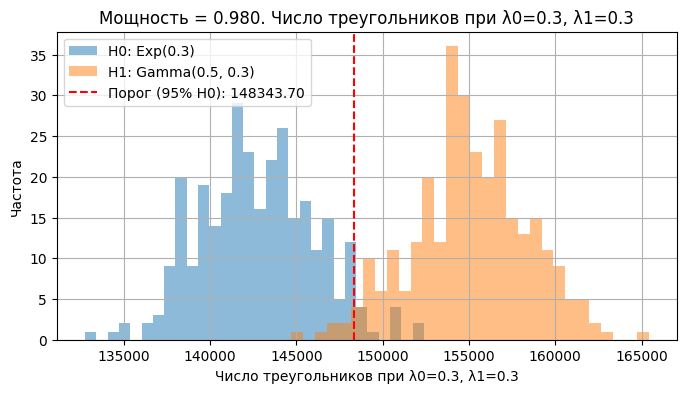

==== Анализ для λ0 = 0.3, λ1 = 0.5 ====


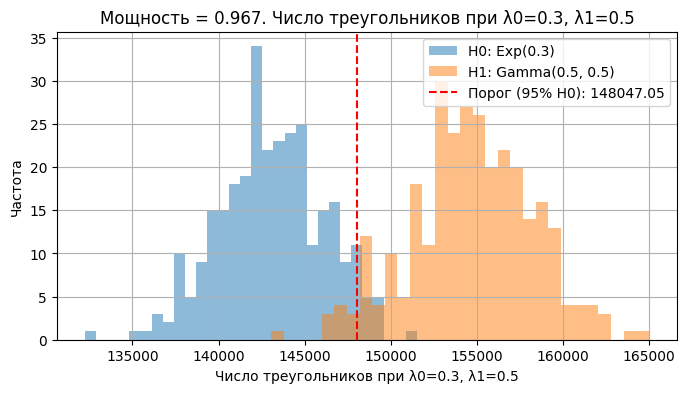

==== Анализ для λ0 = 0.3, λ1 = 1.0 ====


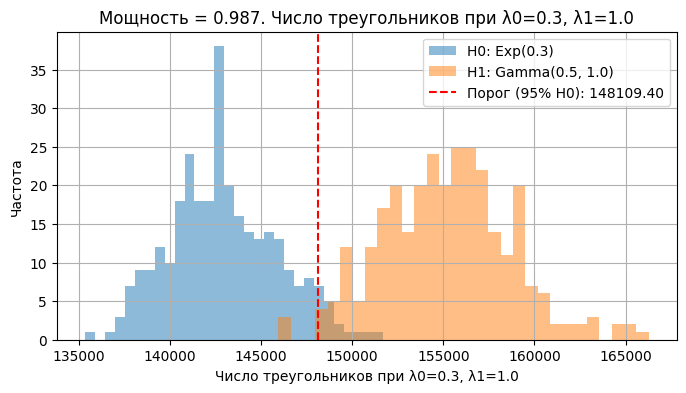

==== Анализ для λ0 = 0.3, λ1 = 1.5 ====


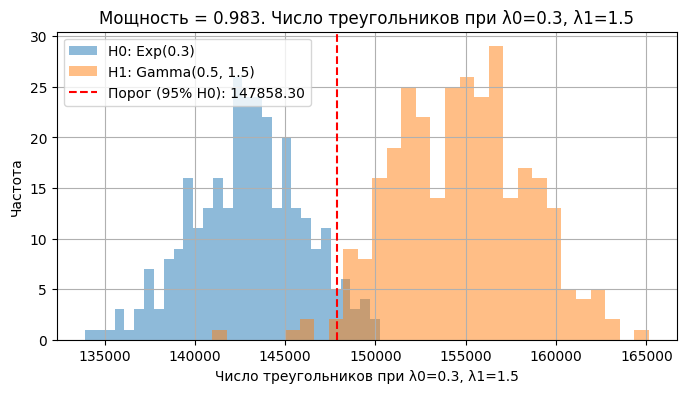

==== Анализ для λ0 = 0.3, λ1 = 2.0 ====


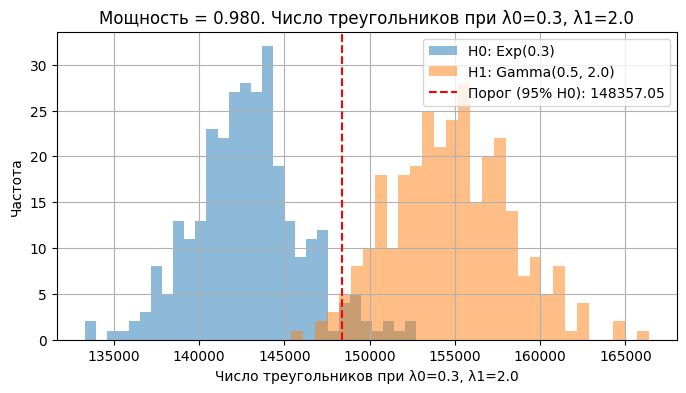

==== Анализ для λ0 = 0.3, λ1 = 3.0 ====


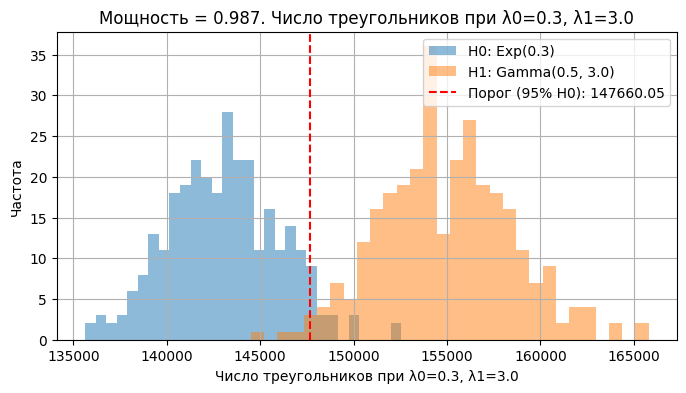

==== Анализ для λ0 = 0.5, λ1 = 0.3 ====


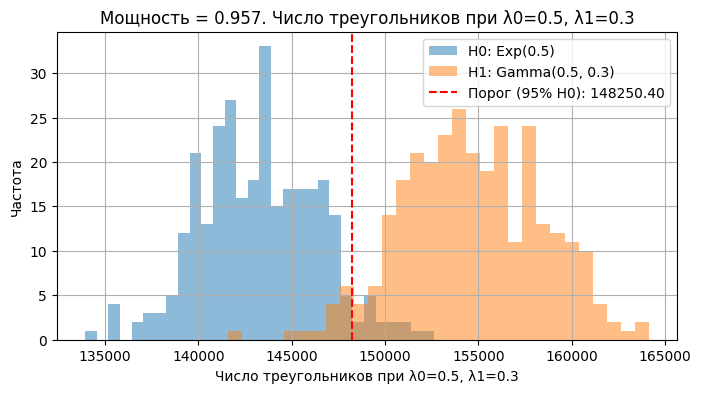

==== Анализ для λ0 = 0.5, λ1 = 0.5 ====


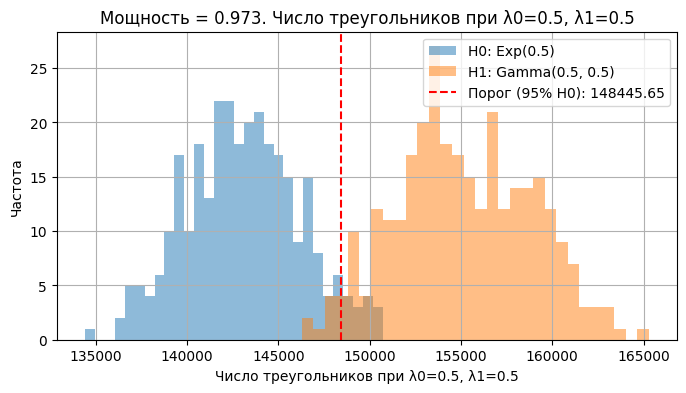

==== Анализ для λ0 = 0.5, λ1 = 1.0 ====


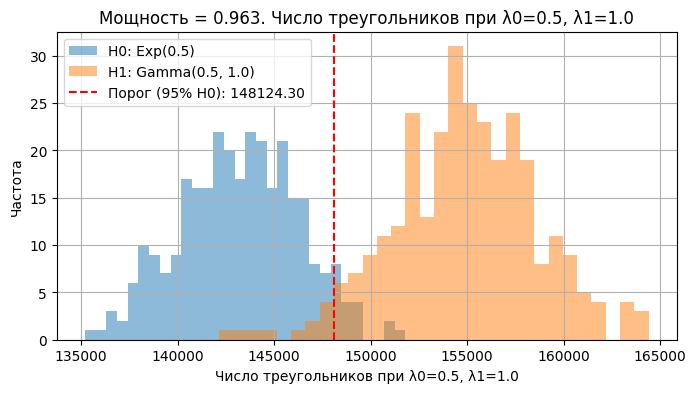

==== Анализ для λ0 = 0.5, λ1 = 1.5 ====


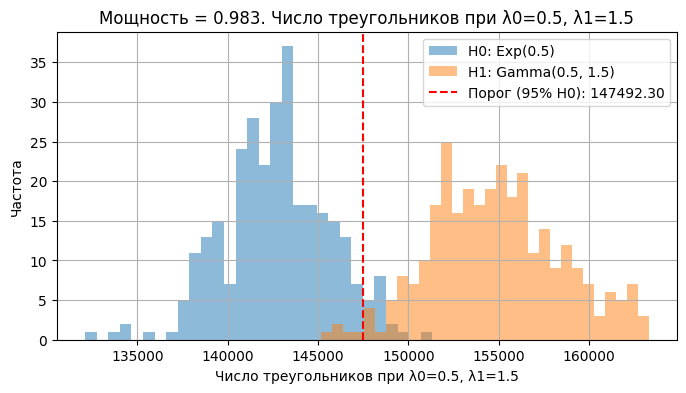

==== Анализ для λ0 = 0.5, λ1 = 2.0 ====


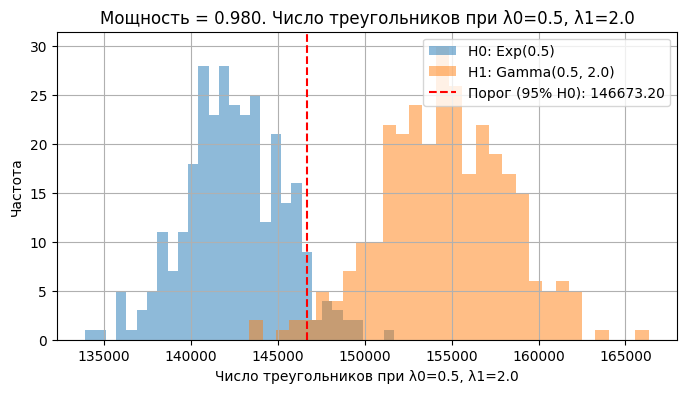

==== Анализ для λ0 = 0.5, λ1 = 3.0 ====


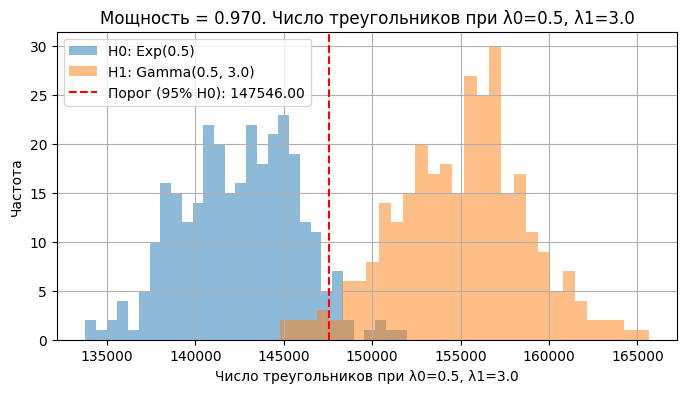

==== Анализ для λ0 = 1.0, λ1 = 0.3 ====


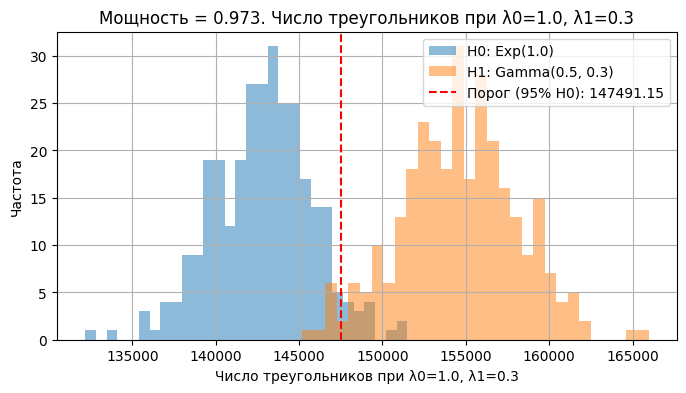

==== Анализ для λ0 = 1.0, λ1 = 0.5 ====


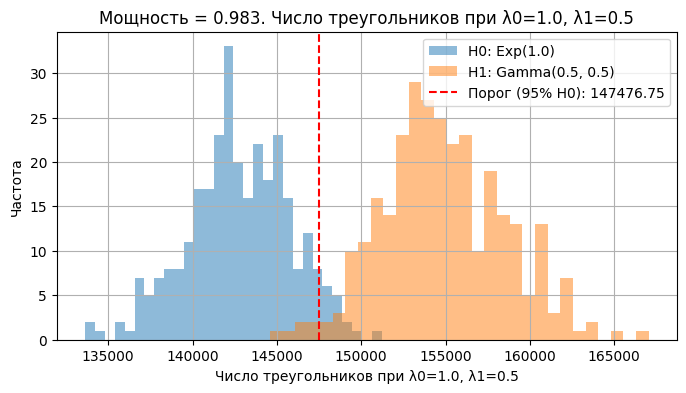

==== Анализ для λ0 = 1.0, λ1 = 1.0 ====


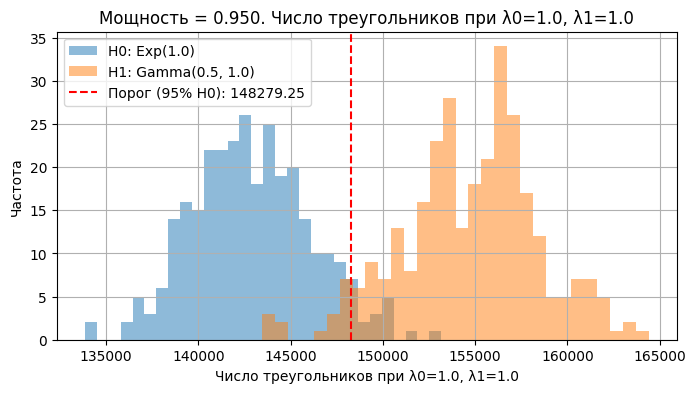

==== Анализ для λ0 = 1.0, λ1 = 1.5 ====


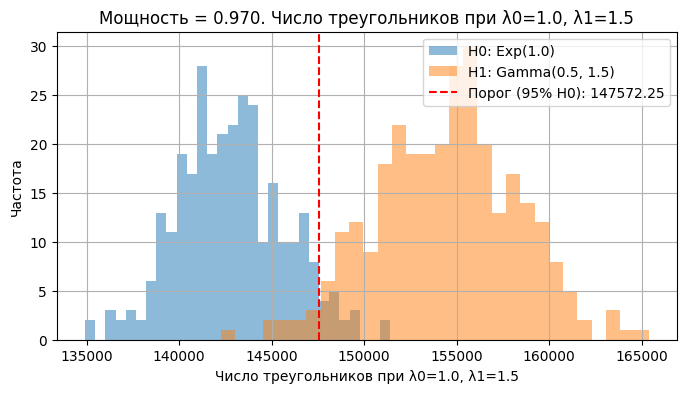

==== Анализ для λ0 = 1.0, λ1 = 2.0 ====


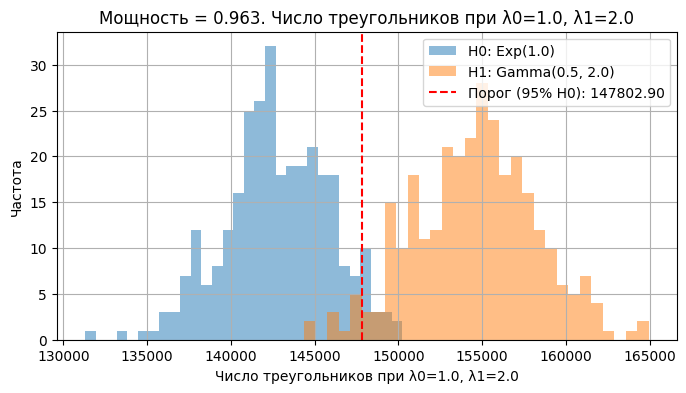

==== Анализ для λ0 = 1.0, λ1 = 3.0 ====


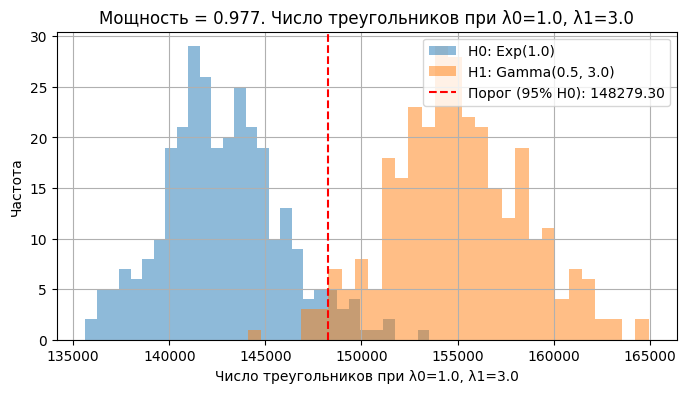

==== Анализ для λ0 = 1.5, λ1 = 0.3 ====


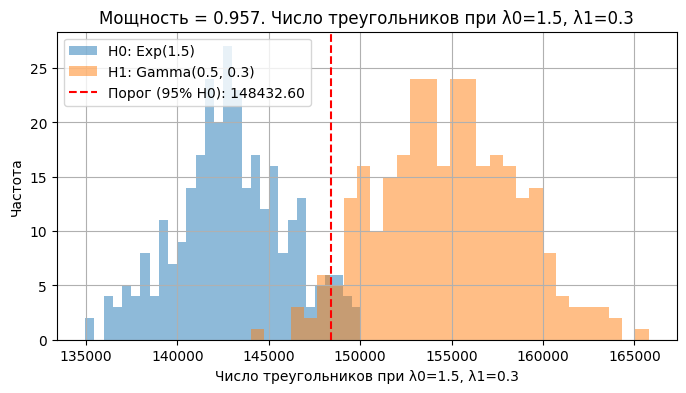

==== Анализ для λ0 = 1.5, λ1 = 0.5 ====


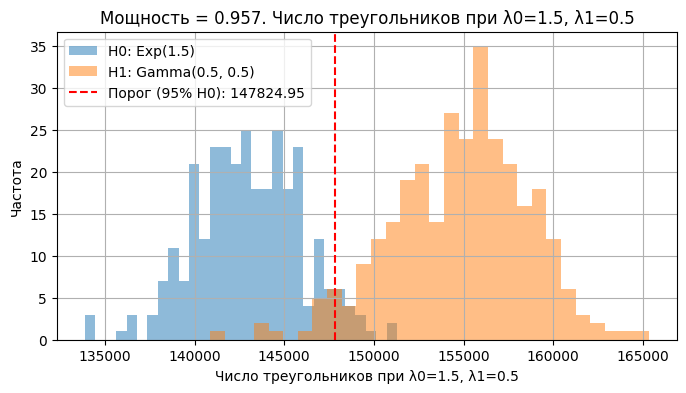

==== Анализ для λ0 = 1.5, λ1 = 1.0 ====


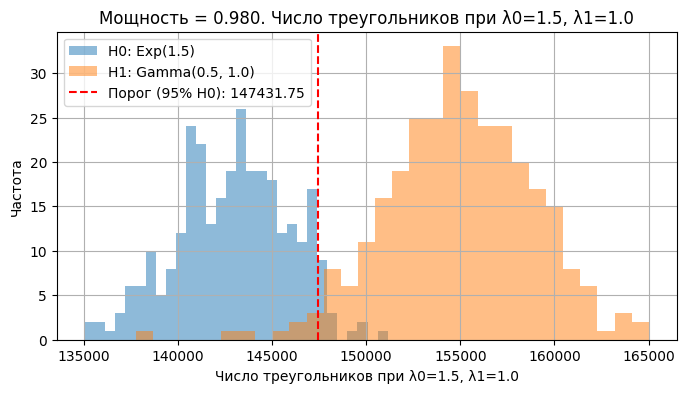

==== Анализ для λ0 = 1.5, λ1 = 1.5 ====


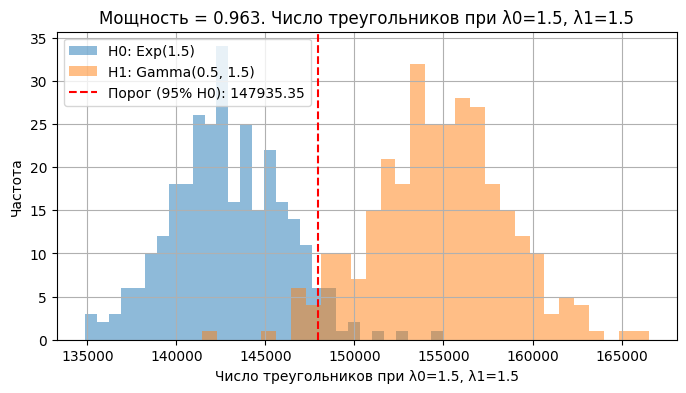

==== Анализ для λ0 = 1.5, λ1 = 2.0 ====


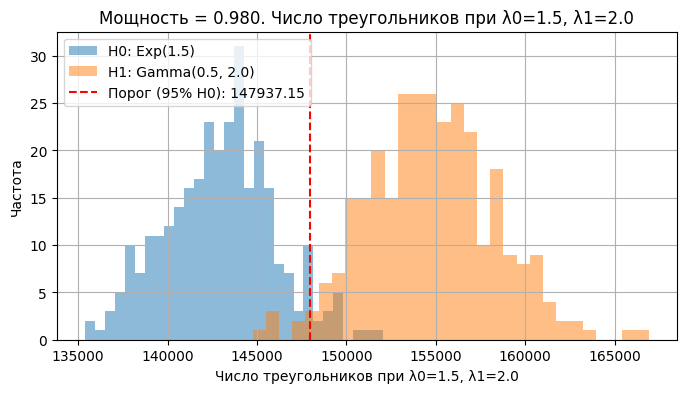

==== Анализ для λ0 = 1.5, λ1 = 3.0 ====


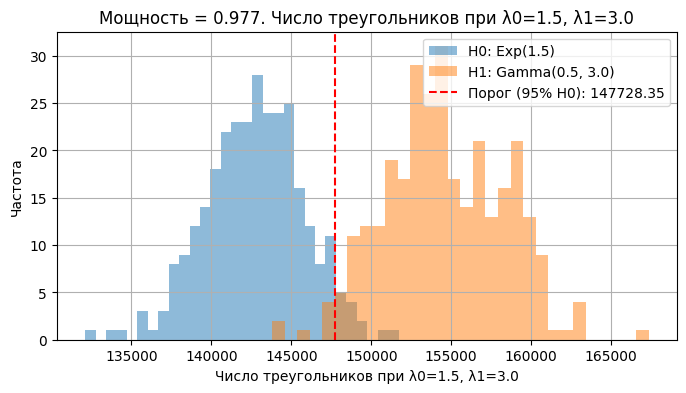

==== Анализ для λ0 = 2.0, λ1 = 0.3 ====


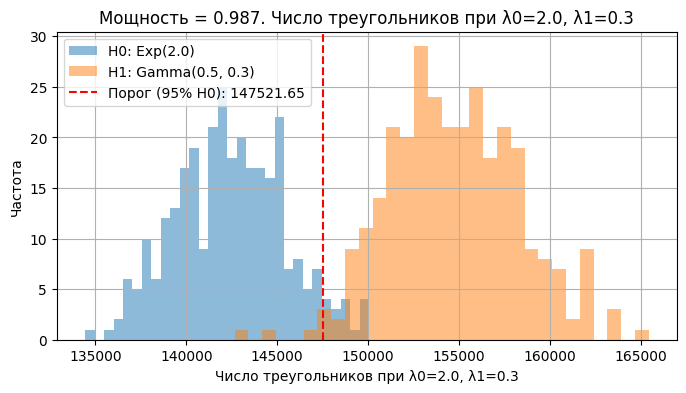

==== Анализ для λ0 = 2.0, λ1 = 0.5 ====


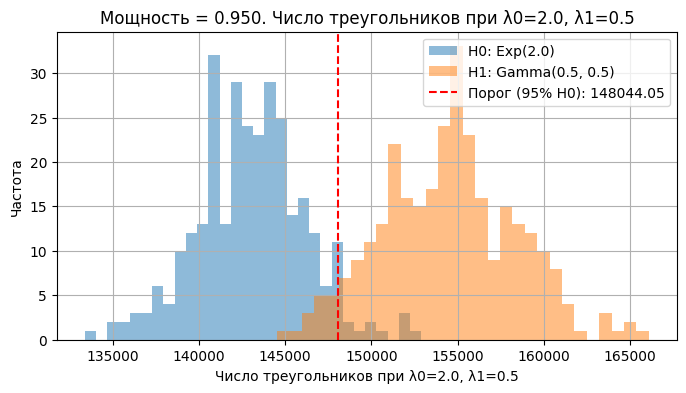

==== Анализ для λ0 = 2.0, λ1 = 1.0 ====


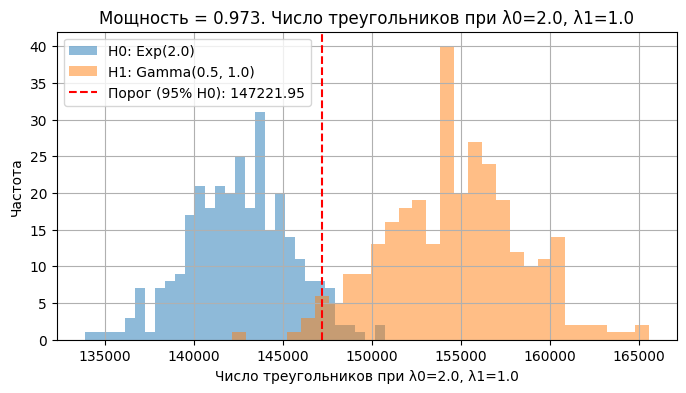

==== Анализ для λ0 = 2.0, λ1 = 1.5 ====


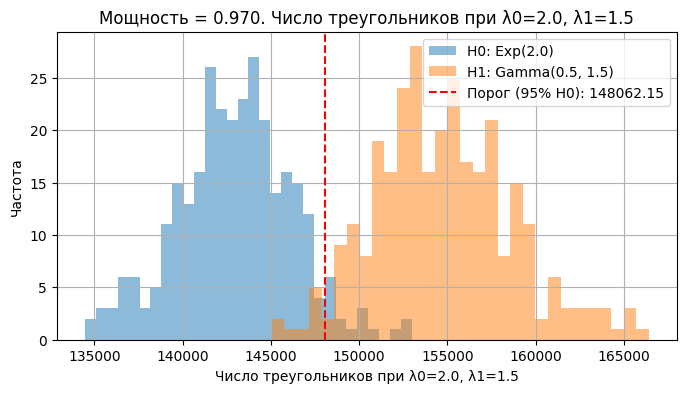

==== Анализ для λ0 = 2.0, λ1 = 2.0 ====


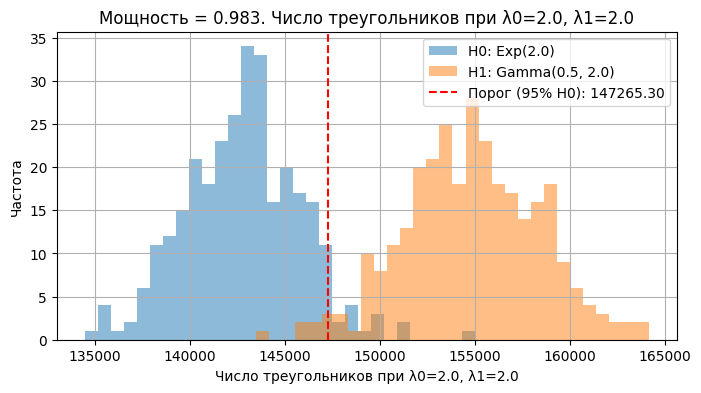

==== Анализ для λ0 = 2.0, λ1 = 3.0 ====


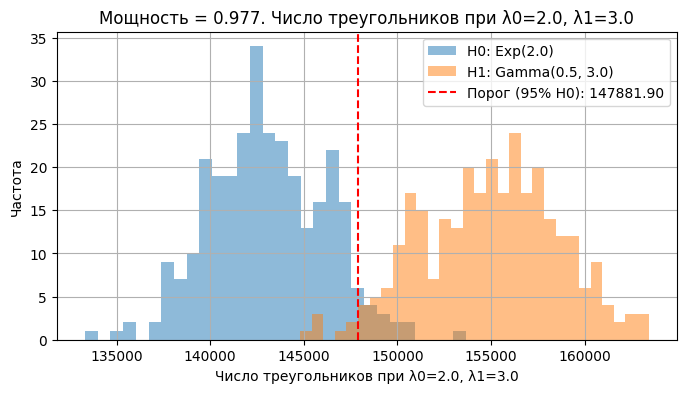

==== Анализ для λ0 = 3.0, λ1 = 0.3 ====


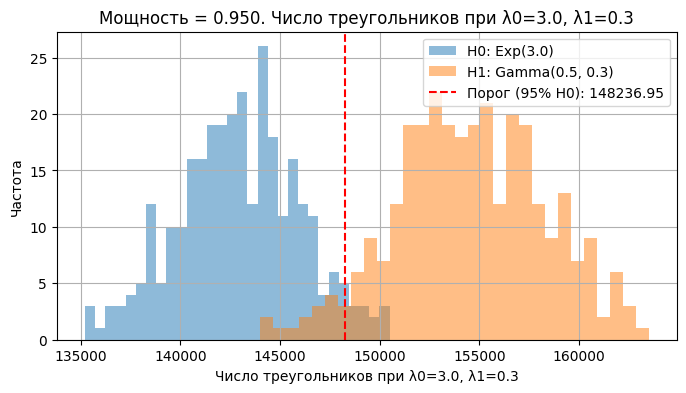

==== Анализ для λ0 = 3.0, λ1 = 0.5 ====


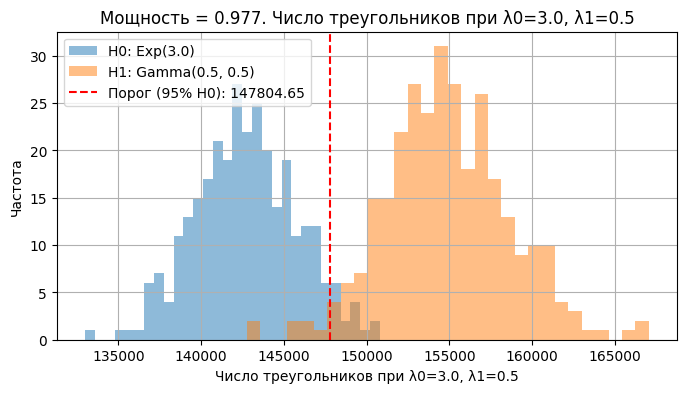

==== Анализ для λ0 = 3.0, λ1 = 1.0 ====


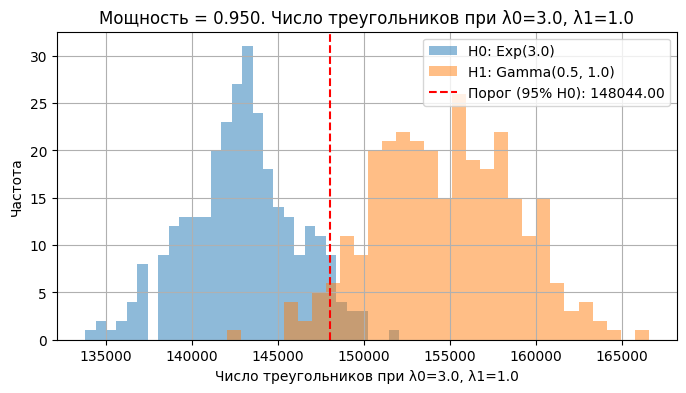

==== Анализ для λ0 = 3.0, λ1 = 1.5 ====


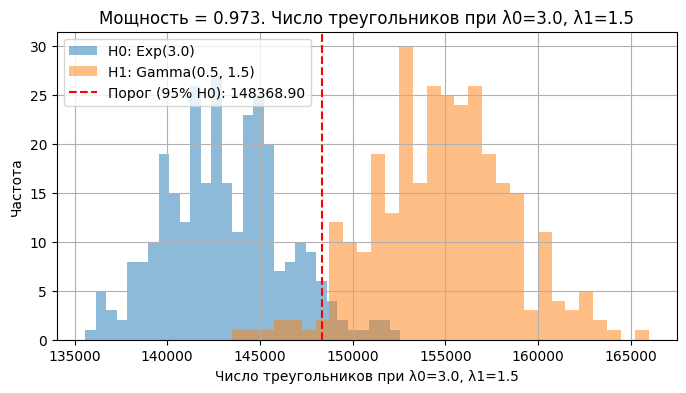

==== Анализ для λ0 = 3.0, λ1 = 2.0 ====


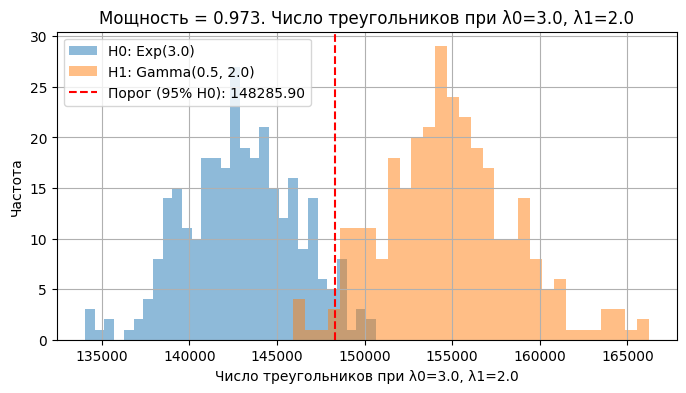

==== Анализ для λ0 = 3.0, λ1 = 3.0 ====


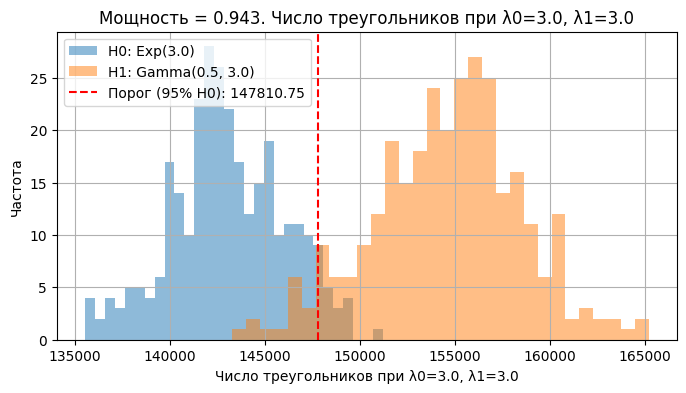

In [6]:
n = 200
k = 60

lambda_H0_values = [0.3, 0.5, 1.0, 1.5, 2.0, 3.0]
lambda_H1_values = [0.3, 0.5, 1.0, 1.5, 2.0, 3.0]

summary_results = []

def analyze_characteristic(T_H0, T_H1, char_name="", k=None, lambda_H0=1, lambda_H1=0.5):
    y_true = np.array([0] * len(T_H0) + [1] * len(T_H1))
    y_scores = np.concatenate([T_H0, T_H1])
    auc_score = roc_auc_score(y_true, y_scores)
    threshold = np.percentile(T_H0, 95)
    type_1_error = np.mean(T_H0 > threshold)
    power = np.mean(T_H1 > threshold)

    plt.figure(figsize=(8, 4))
    plt.hist(T_H0, bins=30, alpha=0.5, label=f'H0: Exp({lambda_H0})')
    plt.hist(T_H1, bins=30, alpha=0.5, label=f'H1: Gamma(0.5, {lambda_H1})')
    plt.axvline(threshold, color='red', linestyle='--', label=f'Порог (95% H0): {threshold:.2f}')
    plt.title(f"Мощность = {power:.3f}. {char_name}")
    plt.xlabel(f'{char_name}')
    plt.ylabel('Частота')
    plt.legend()
    plt.grid()
    plt.show()

    summary_results.append({
        'n': n,
        'k': k,
        'Lambda H0': lambda_H0,
        'Lambda H1': lambda_H1,
        'AUC ROC': auc_score,
        'Threshold (95% H0)': threshold,
        'Type I Error (H0)': type_1_error,
        'Power (H1)': power
    })

n_sim = 300

for lambda_H0 in lambda_H0_values:
    for lambda_H1 in lambda_H1_values:
        print(f"==== Анализ для λ0 = {lambda_H0}, λ1 = {lambda_H1} ====")
        T_knn_H0 = monte_carlo_characteristic(sample_exp, lambda X: build_knn_graph(X, k), count_triangles, lambda_H0, n=n, n_sim=n_sim)
        T_knn_H1 = monte_carlo_characteristic(sample_gamma, lambda X: build_knn_graph(X, k), count_triangles, 0.5, lambda_H1, n=n, n_sim=n_sim)
        analyze_characteristic(T_knn_H0, T_knn_H1,
                               char_name=f"Число треугольников при λ0={lambda_H0}, λ1={lambda_H1}",
                               k=k, lambda_H0=lambda_H0, lambda_H1=lambda_H1)

Ну и по традиции сделаем табличку с выводом.

In [7]:
from IPython.display import display
summary_df = pd.DataFrame(summary_results)
display(summary_df)

n   k  Lambda H0  Lambda H1   AUC ROC  Threshold (95% H0)  \
0   200  60        0.3        0.3  0.994872           148343.70   
1   200  60        0.3        0.5  0.993478           148047.05   
2   200  60        0.3        1.0  0.996678           148109.40   
3   200  60        0.3        1.5  0.994256           147858.30   
4   200  60        0.3        2.0  0.993611           148357.05   
5   200  60        0.3        3.0  0.995611           147660.05   
6   200  60        0.5        0.3  0.989611           148250.40   
7   200  60        0.5        0.5  0.995700           148445.65   
8   200  60        0.5        1.0  0.989811           148124.30   
9   200  60        0.5        1.5  0.996800           147492.30   
10  200  60        0.5        2.0  0.994461           146673.20   
11  200  60        0.5        3.0  0.994378           147546.00   
12  200  60        1.0        0.3  0.995578           147491.15   
13  200  60        1.0        0.5  0.996300           147476.75   
14  200  60        1.0        1.0  0.988567           148279.25   
15  200  60        1.0        1.5  0.991750           147572.25   
16  200  60        1.0        2.0  0.993811           147802.90   
17  200  60        1.0        3.0  0.994583           148279.30   
18  200  60        1.5        0.3  0.994683           148432.60   
19  200  60        1.5        0.5  0.989533           147824.95   
20  200  60        1.5        1.0  0.990433           147431.75   
21  200  60        1.5        1.5  0.990489           147935.35   
22  200  60        1.5        2.0  0.994772           147937.15   
23  200  60        1.5        3.0  0.994272           147728.35   
24  200  60        2.0        0.3  0.995889           147521.65   
25  200  60        2.0        0.5  0.989994           148044.05   
26  200  60        2.0        1.0  0.994600           147221.95   
27  200  60        2.0        1.5  0.992278           148062.15   
28  200  60        2.0        2.0  0.993250           147265.30   
29  200  60        2.0        3.0  0.993289           147881.90   
30  200  60        3.0        0.3  0.991983           148236.95   
31  200  60        3.0        0.5  0.993339           147804.65   
32  200  60        3.0        1.0  0.990628           148044.00   
33  200  60        3.0        1.5  0.990944           148368.90   
34  200  60        3.0        2.0  0.995272           148285.90   
35  200  60        3.0        3.0  0.989156           147810.75   

    Type I Error (H0)  Power (H1)  
0                0.05    0.980000  
1                0.05    0.966667  
2                0.05    0.986667  
3                0.05    0.983333  
4                0.05    0.980000  
5                0.05    0.986667  
6                0.05    0.956667  
7                0.05    0.973333  
8                0.05    0.963333  
9                0.05    0.983333  
10               0.05    0.980000  
11               0.05    0.970000  
12               0.05    0.973333  
13               0.05    0.983333  
14               0.05    0.950000  
15               0.05    0.970000  
16               0.05    0.963333  
17               0.05    0.976667  
18               0.05    0.956667  
19               0.05    0.956667  
20               0.05    0.980000  
21               0.05    0.963333  
22               0.05    0.980000  
23               0.05    0.976667  
24               0.05    0.986667  
25               0.05    0.950000  
26               0.05    0.973333  
27               0.05    0.970000  
28               0.05    0.983333  
29               0.05    0.976667  
30               0.05    0.950000  
31               0.05    0.976667  
32               0.05    0.950000  
33               0.05    0.973333  
34               0.05    0.973333  
35               0.05    0.943333

## Вывод будет простыми и красивым

- при n = 200 и k = 60 вне зависимости от параметров распределений мощность остается выше 0.94, AUC не ниже 0.98. значит характеристика - число треугольников работает отлично.


## DIST-граф. Перебор N и d.



Напишем функции которые стоят граф и ычисляют хроматическое число

In [8]:

def build_dist_graph(X, d):
    G = nx.Graph()
    n = len(X)
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i + 1, n):
            if abs(X[i] - X[j]) <= d:
                G.add_edge(i, j)
    return G

def chromatic_number(G):
    coloring = nx.coloring.greedy_color(G, strategy='largest_first')
    return max(coloring.values()) + 1


Общую структуру менять не будем, просто повторим работу.

==== Анализ для n = 100, d=0.05 ====


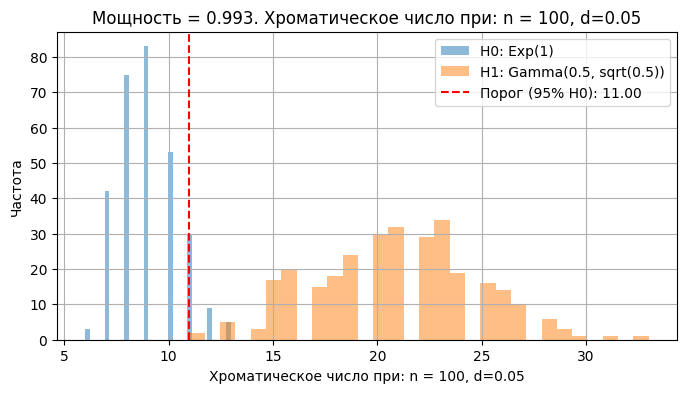

==== Анализ для n = 100, d=0.1 ====


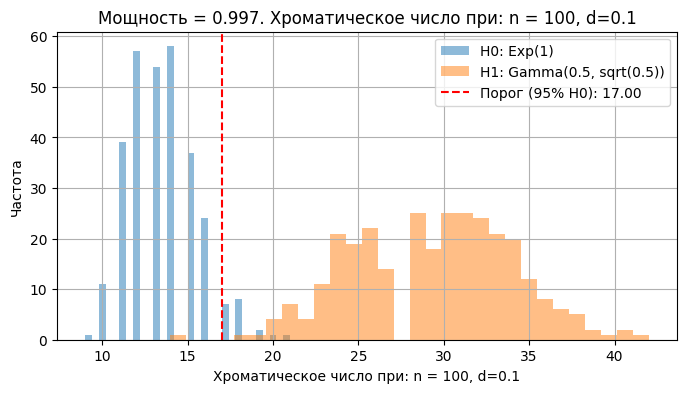

==== Анализ для n = 100, d=0.2 ====


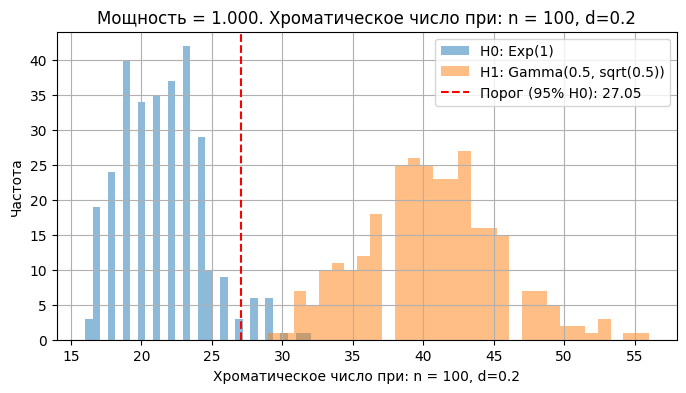

==== Анализ для n = 100, d=0.3 ====


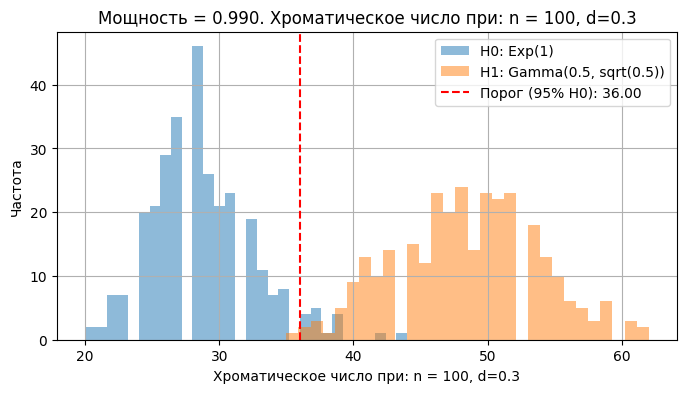

==== Анализ для n = 100, d=0.4 ====


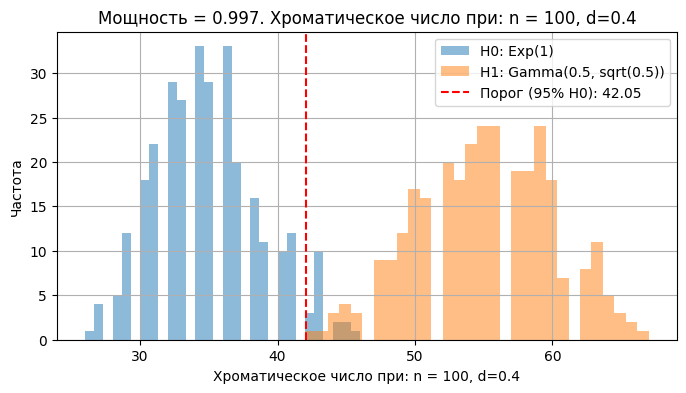

==== Анализ для n = 100, d=0.5 ====


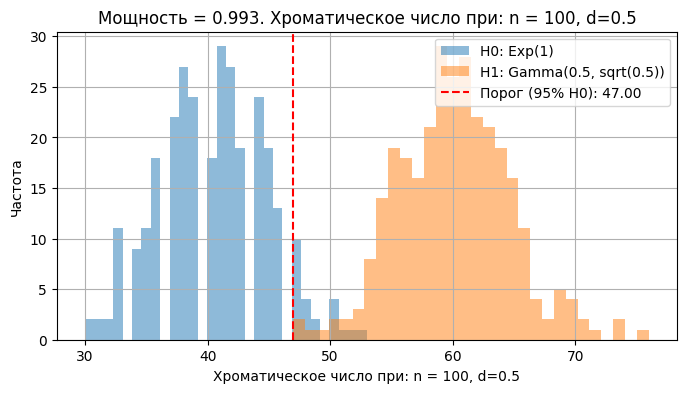

==== Анализ для n = 100, d=0.7 ====


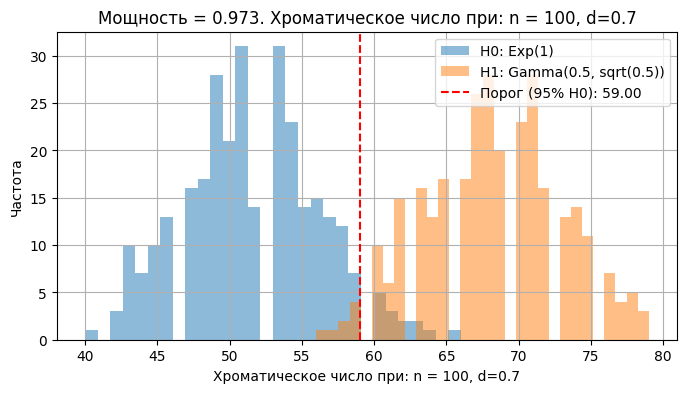

==== Анализ для n = 100, d=1.0 ====


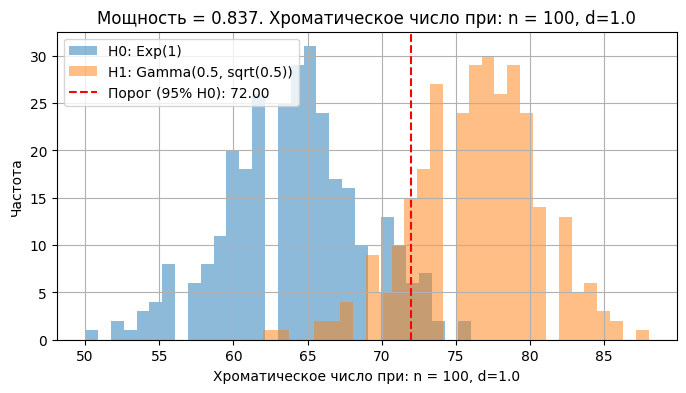

==== Анализ для n = 100, d=2.0 ====


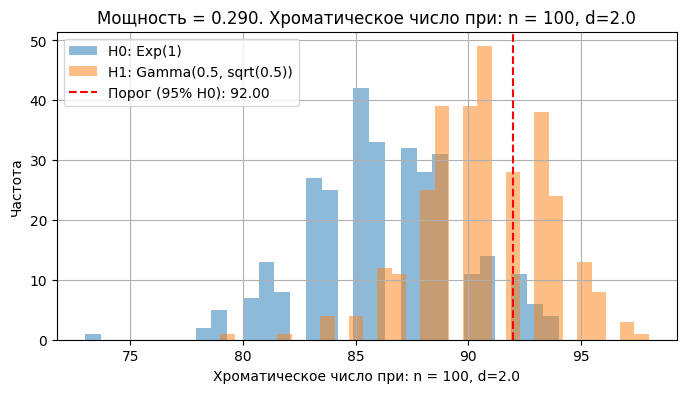

==== Анализ для n = 200, d=0.05 ====


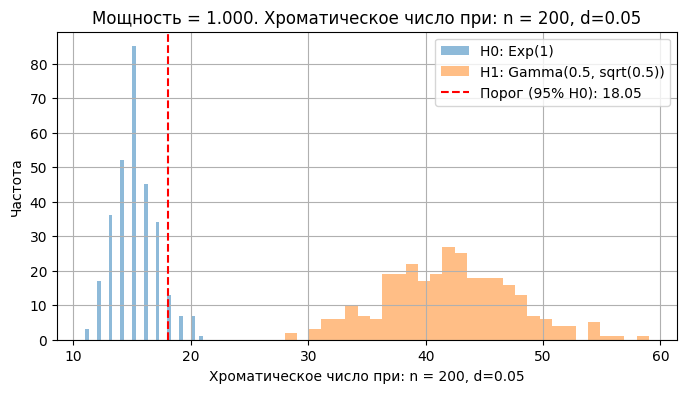

==== Анализ для n = 200, d=0.1 ====


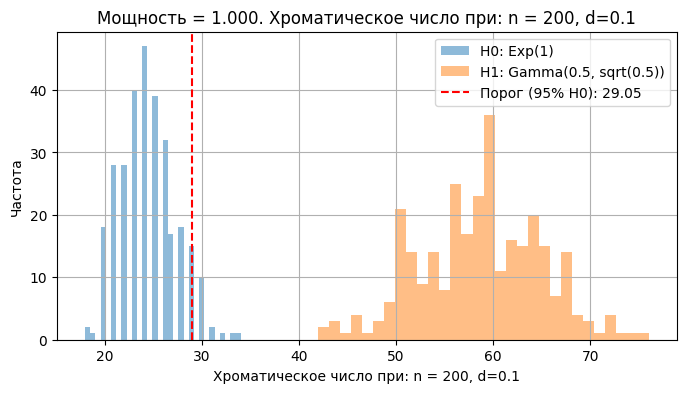

==== Анализ для n = 200, d=0.2 ====


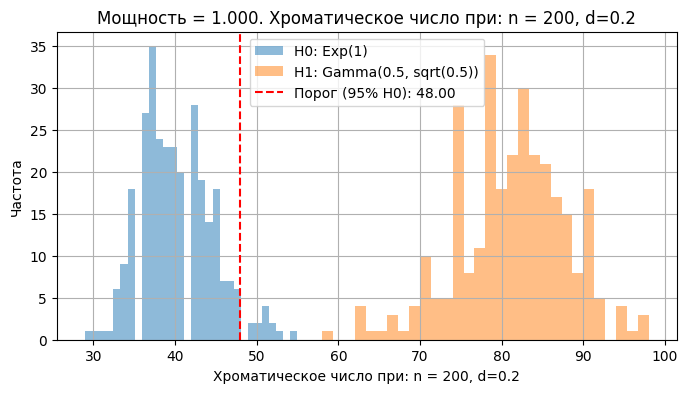

==== Анализ для n = 200, d=0.3 ====


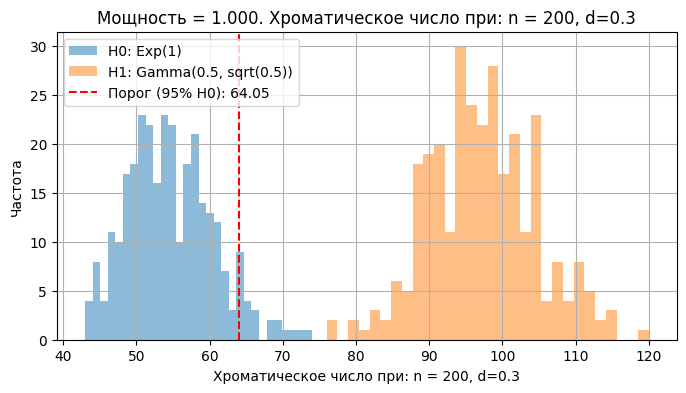

==== Анализ для n = 200, d=0.4 ====


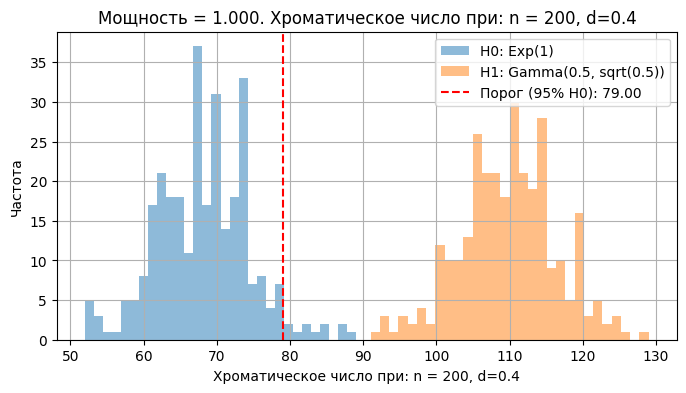

==== Анализ для n = 200, d=0.5 ====


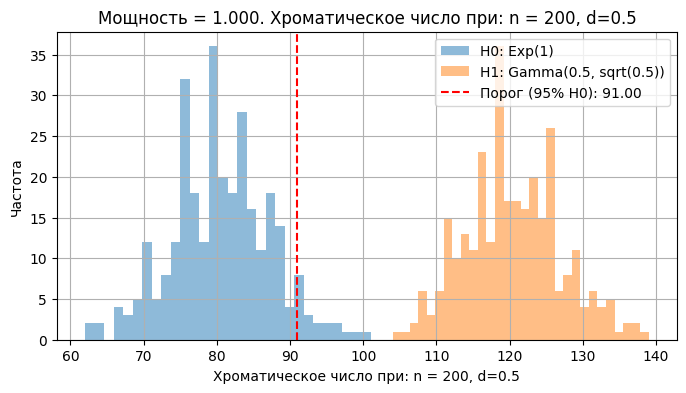

==== Анализ для n = 200, d=0.7 ====


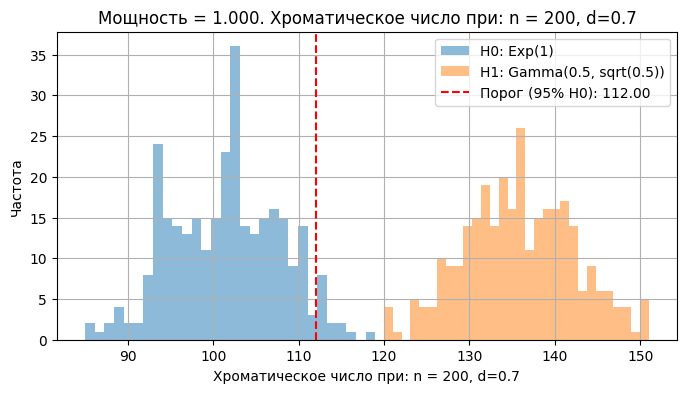

==== Анализ для n = 200, d=1.0 ====


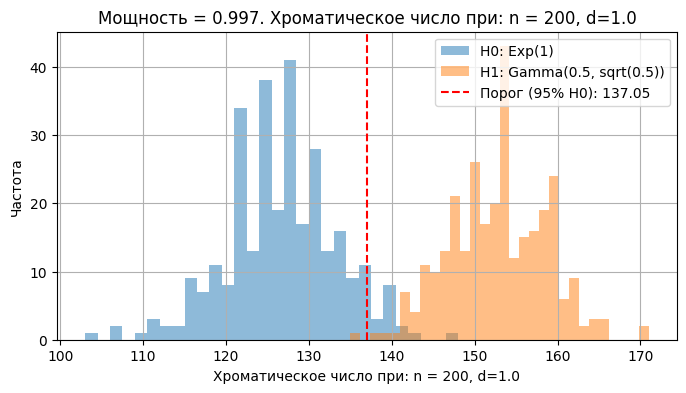

==== Анализ для n = 200, d=2.0 ====


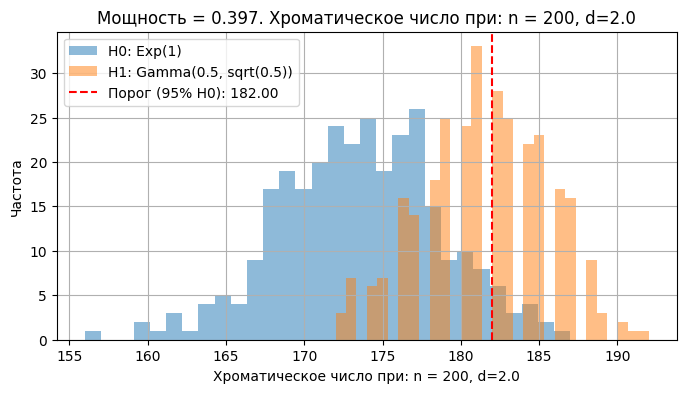

==== Анализ для n = 500, d=0.05 ====


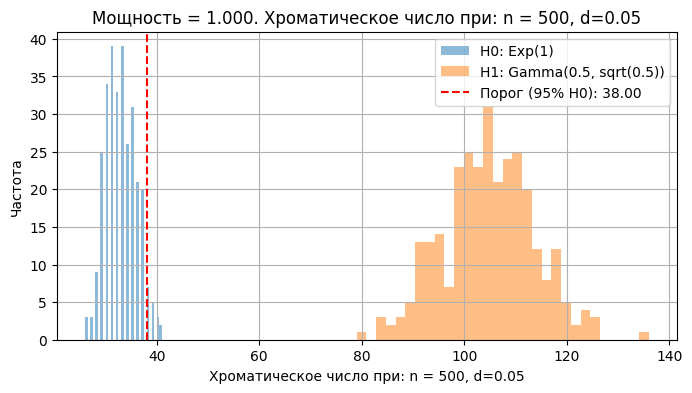

==== Анализ для n = 500, d=0.1 ====


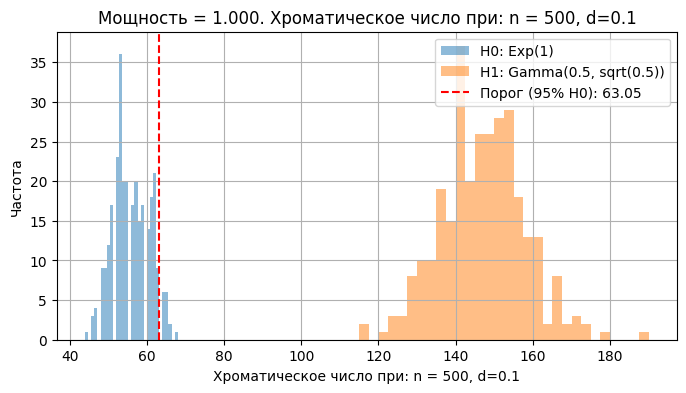

==== Анализ для n = 500, d=0.2 ====


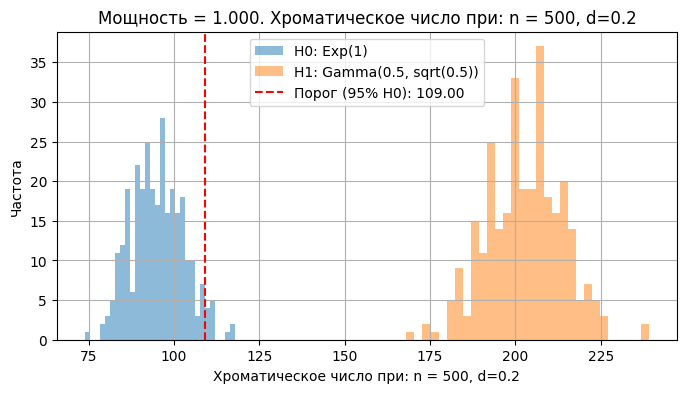

==== Анализ для n = 500, d=0.3 ====


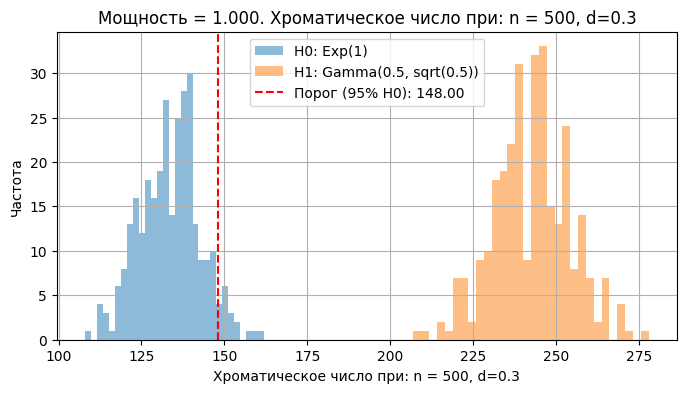

==== Анализ для n = 500, d=0.4 ====


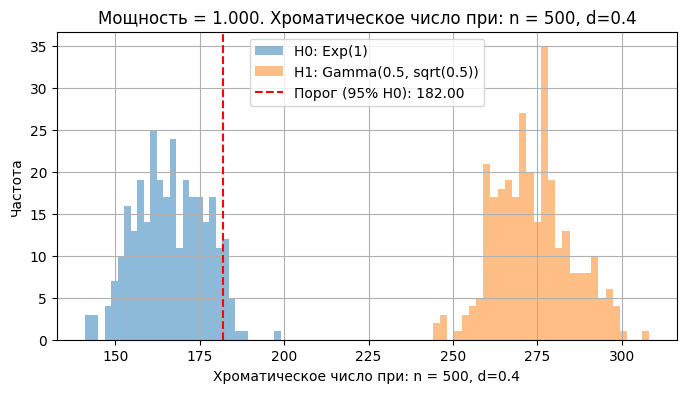

==== Анализ для n = 500, d=0.5 ====


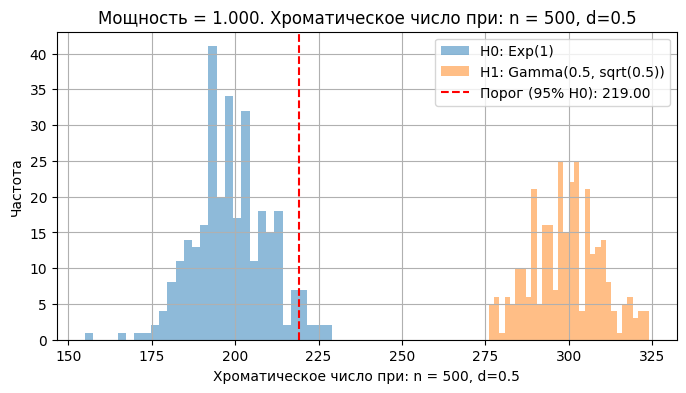

==== Анализ для n = 500, d=0.7 ====


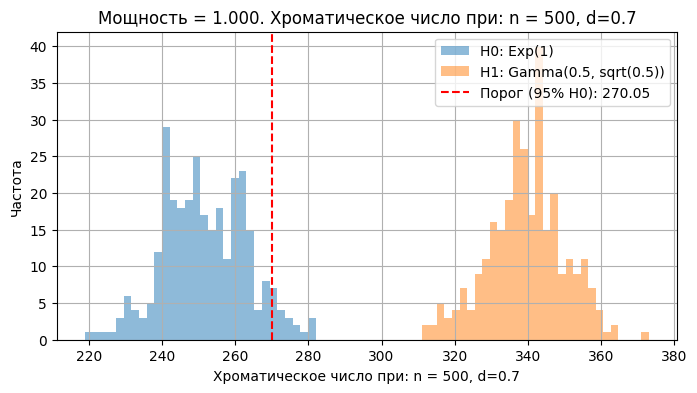

==== Анализ для n = 500, d=1.0 ====


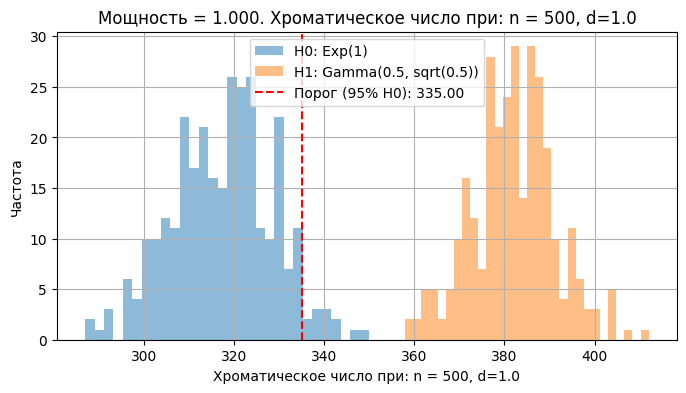

==== Анализ для n = 500, d=2.0 ====


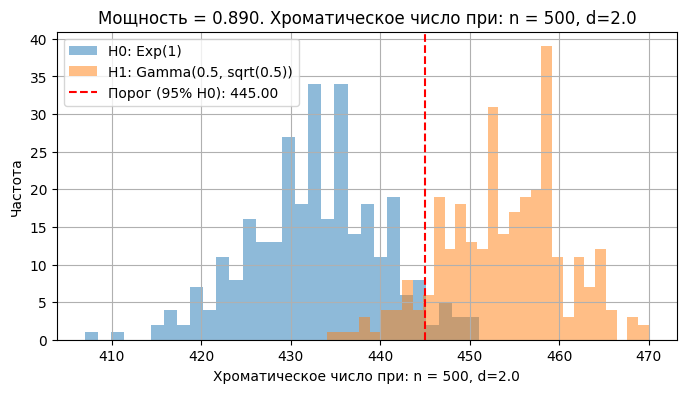

==== Анализ для n = 1000, d=0.05 ====


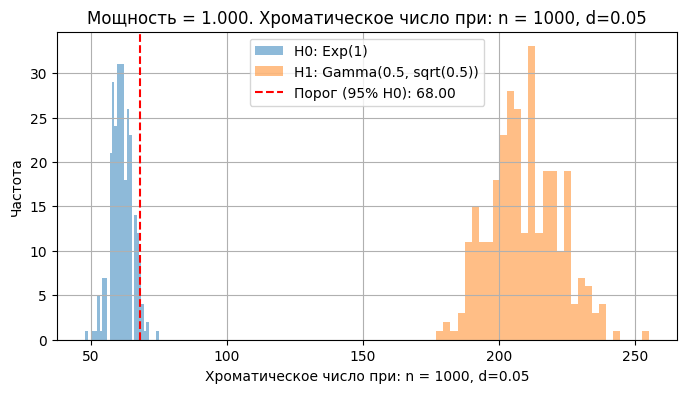

==== Анализ для n = 1000, d=0.1 ====


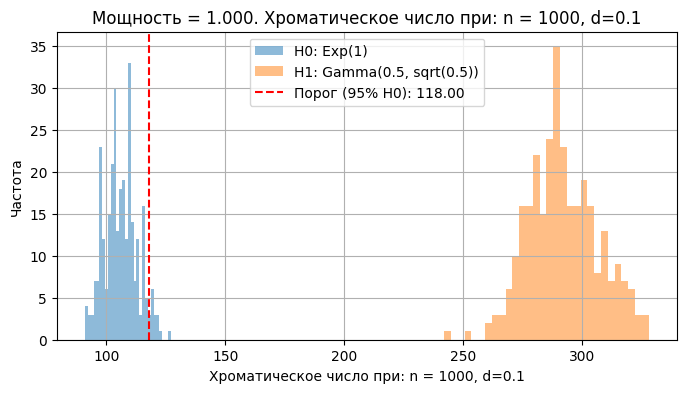

==== Анализ для n = 1000, d=0.2 ====


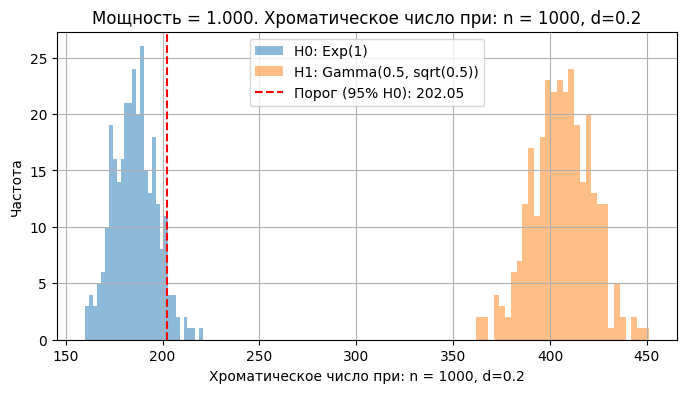

==== Анализ для n = 1000, d=0.3 ====


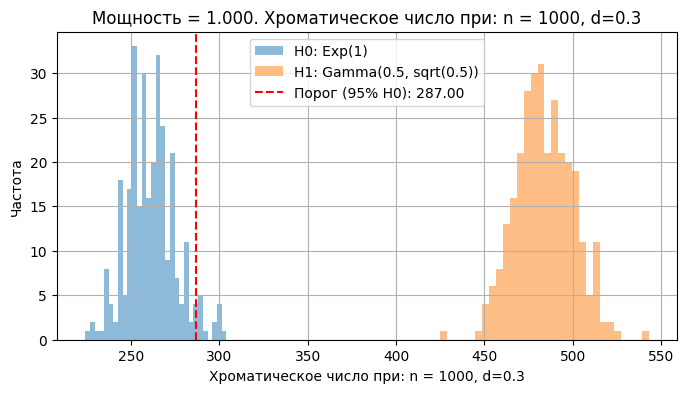

==== Анализ для n = 1000, d=0.4 ====


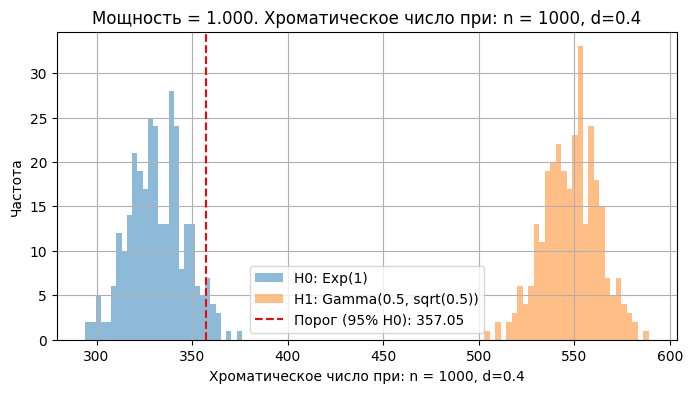

==== Анализ для n = 1000, d=0.5 ====


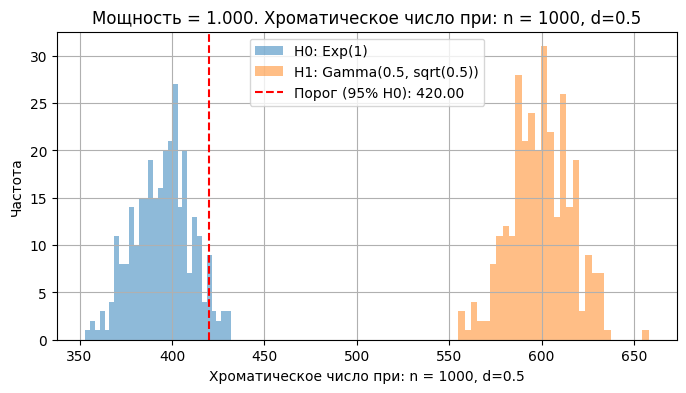

==== Анализ для n = 1000, d=0.7 ====


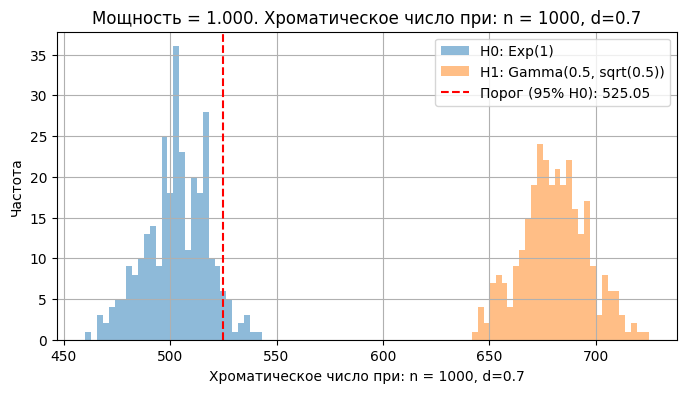

==== Анализ для n = 1000, d=1.0 ====


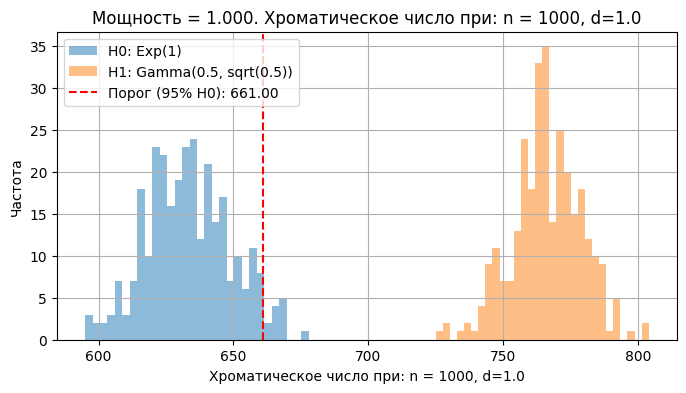

==== Анализ для n = 1000, d=2.0 ====


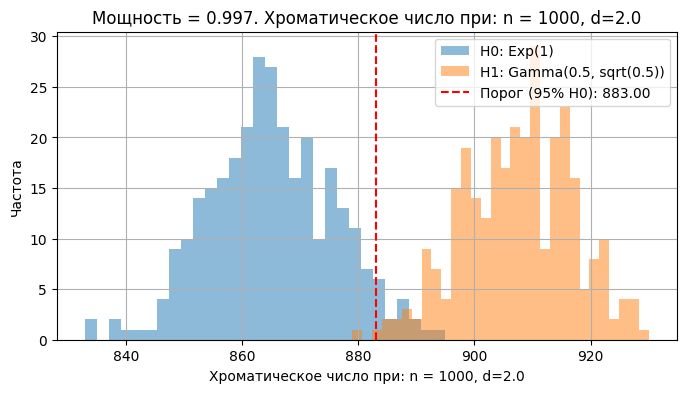

In [9]:
summary_results = []

n_sim = 300

def analyze_characteristic(T_H0, T_H1, char_name="", d=None):
    y_true = np.array([0] * len(T_H0) + [1] * len(T_H1))
    y_scores = np.concatenate([T_H0, T_H1])
    auc_score = roc_auc_score(y_true, y_scores)
    threshold = np.percentile(T_H0, 95)
    type_1_error = np.mean(T_H0 > threshold)
    power = np.mean(T_H1 > threshold)

    plt.figure(figsize=(8, 4))
    plt.hist(T_H0, bins=30, alpha=0.5, label='H0: Exp(1)')
    plt.hist(T_H1, bins=30, alpha=0.5, label='H1: Gamma(0.5, sqrt(0.5))')
    plt.axvline(threshold, color='red', linestyle='--', label=f'Порог (95% H0): {threshold:.2f}')
    plt.title(f"Мощность = {power:.3f}. {char_name}")
    plt.xlabel(f'{char_name}')
    plt.ylabel('Частота')
    plt.legend()
    plt.grid()
    plt.show()

    summary_results.append({
        'd': d,
        'AUC ROC': auc_score,
        'Threshold (95% H0)': threshold,
        'Type I Error (H0)': type_1_error,
        'Power (H1)': power
    })

d_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0, 2.0]
n_values = [100, 200, 500, 1000]
for n in n_values:
    for d in d_values:
        print(f"==== Анализ для n = {n}, d={d} ====")
        T_dist_H0 = monte_carlo_characteristic(sample_exp, lambda X: build_dist_graph(X, d), chromatic_number, 1, n=n, n_sim=n_sim)
        T_dist_H1 = monte_carlo_characteristic(sample_gamma, lambda X: build_dist_graph(X, d), chromatic_number, 0.5, np.sqrt(0.5), n=n, n_sim=n_sim)
        analyze_characteristic(T_dist_H0, T_dist_H1, char_name=f"Хроматическое число при: n = {n}, d={d}", d=d)

и куда же без таблички

In [10]:
from IPython.display import display
summary_df = pd.DataFrame(summary_results)
display(summary_df)

d   AUC ROC  Threshold (95% H0)  Type I Error (H0)  Power (H1)
0   0.05  0.999217               11.00           0.046667    0.993333
1   0.10  0.998561               17.00           0.040000    0.996667
2   0.20  0.999761               27.05           0.050000    1.000000
3   0.30  0.997961               36.00           0.040000    0.990000
4   0.40  0.999467               42.05           0.050000    0.996667
5   0.50  0.999128               47.00           0.043333    0.993333
6   0.70  0.993944               59.00           0.046667    0.973333
7   1.00  0.974989               72.00           0.036667    0.836667
8   2.00  0.846994               92.00           0.033333    0.290000
9   0.05  1.000000               18.05           0.050000    1.000000
10  0.10  1.000000               29.05           0.050000    1.000000
11  0.20  1.000000               48.00           0.040000    1.000000
12  0.30  1.000000               64.05           0.050000    1.000000
13  0.40  1.000000               79.00           0.036667    1.000000
14  0.50  1.000000               91.00           0.040000    1.000000
15  0.70  1.000000              112.00           0.046667    1.000000
16  1.00  0.998522              137.05           0.050000    0.996667
17  2.00  0.890639              182.00           0.033333    0.396667
18  0.05  1.000000               38.00           0.033333    1.000000
19  0.10  1.000000               63.05           0.050000    1.000000
20  0.20  1.000000              109.00           0.040000    1.000000
21  0.30  1.000000              148.00           0.046667    1.000000
22  0.40  1.000000              182.00           0.043333    1.000000
23  0.50  1.000000              219.00           0.043333    1.000000
24  0.70  1.000000              270.05           0.050000    1.000000
25  1.00  1.000000              335.00           0.040000    1.000000
26  2.00  0.982261              445.00           0.043333    0.890000
27  0.05  1.000000               68.00           0.026667    1.000000
28  0.10  1.000000              118.00           0.046667    1.000000
29  0.20  1.000000              202.05           0.050000    1.000000
30  0.30  1.000000              287.00           0.043333    1.000000
31  0.40  1.000000              357.05           0.050000    1.000000
32  0.50  1.000000              420.00           0.046667    1.000000
33  0.70  1.000000              525.05           0.050000    1.000000
34  1.00  1.000000              661.00           0.040000    1.000000
35  2.00  0.998678              883.00           0.046667    0.996667

## Вывод


- **Размер выборки** оказывает **незначительное влияние** на результат при разумных значениях `k`.
- При `d ≤ 0.3`:
  - **AUC ROC** стабильно высок (≈ 0.99–1.0), даже при минимальных значениях `d`.
  - **Ошибка H0** контролируется на уровне ≈ 0.05.
  - **H1** приближается к 1.0 — достигается почти полное различие между H₀ и H₁.
  - Следовательно, малые значения `d` (до `0.3`) **не ухудшают** качество классификации и проверки гипотез.
- **Рекомендуемый диапазон параметров** для практики:
  - `k ≥ 40`
  - `d ≤ 0.3`

> Параметры `k` и `d` оказывают ключевое влияние на результат анализа. Из них `k` значительно важнее, но при слишком больших `d` (выше 0.3) возможна потеря качества.



## DIST-граф. Перебор N и d.

==== Анализ для λ0 = 0.3, λ1 = 0.3 ====


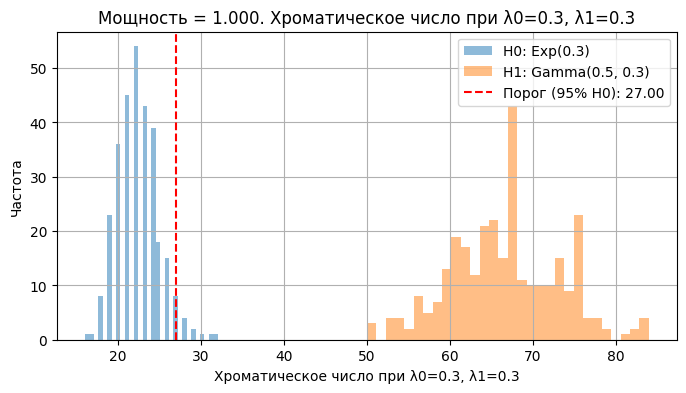

==== Анализ для λ0 = 0.3, λ1 = 0.5 ====


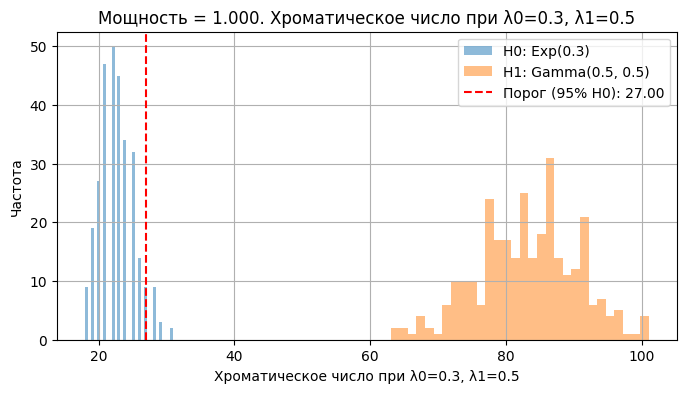

==== Анализ для λ0 = 0.3, λ1 = 1.0 ====


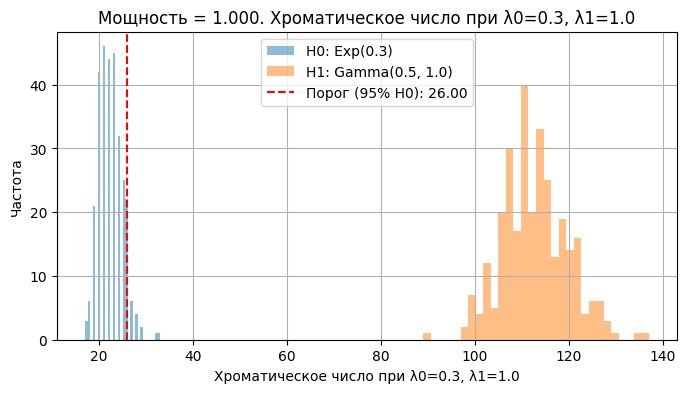

==== Анализ для λ0 = 0.3, λ1 = 1.5 ====


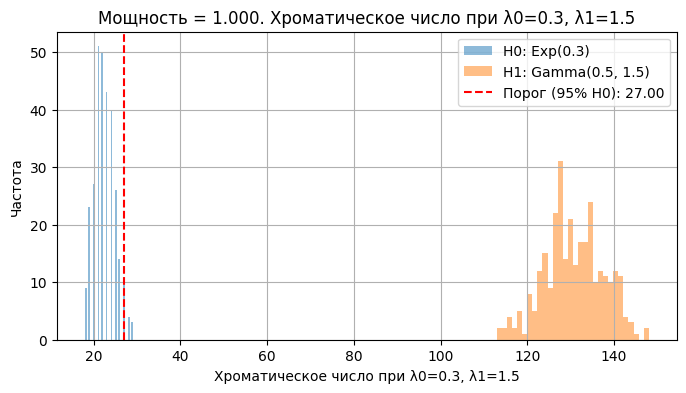

==== Анализ для λ0 = 0.3, λ1 = 2.0 ====


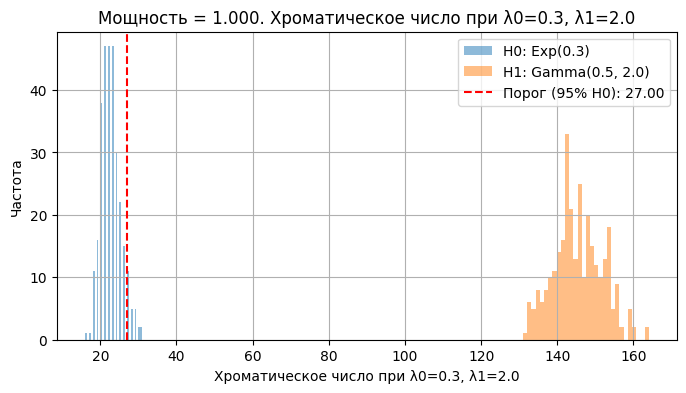

==== Анализ для λ0 = 0.3, λ1 = 3.0 ====


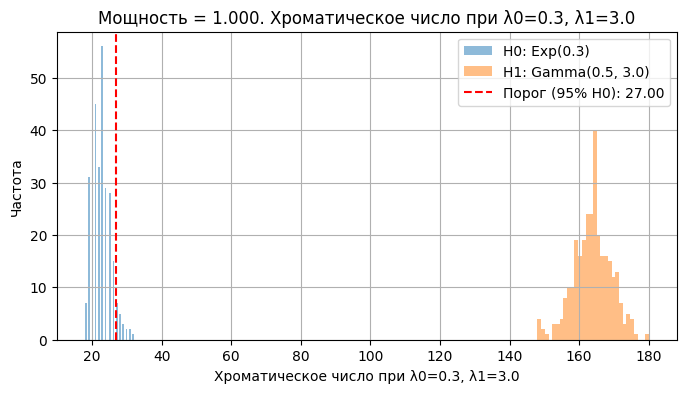

==== Анализ для λ0 = 0.5, λ1 = 0.3 ====


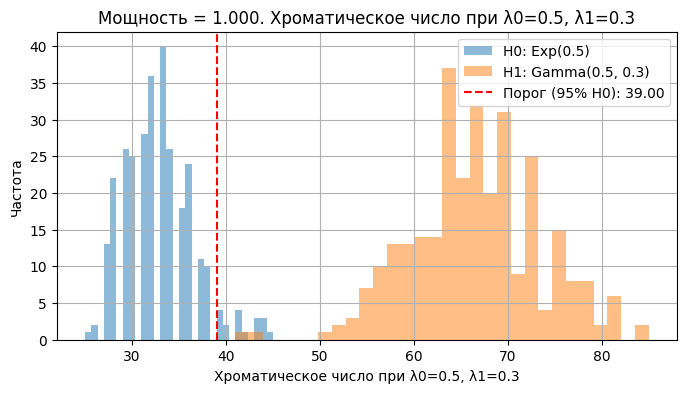

==== Анализ для λ0 = 0.5, λ1 = 0.5 ====


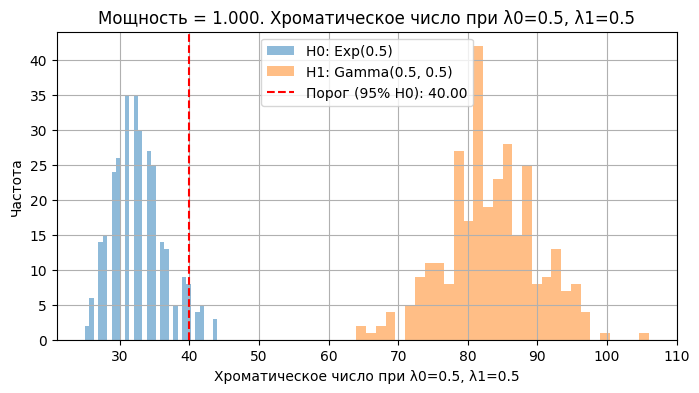

==== Анализ для λ0 = 0.5, λ1 = 1.0 ====


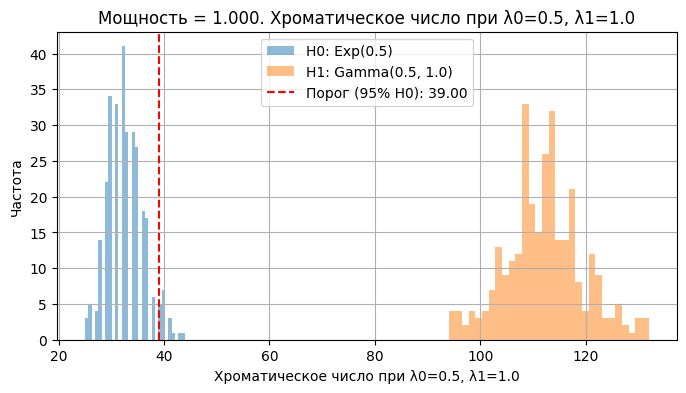

==== Анализ для λ0 = 0.5, λ1 = 1.5 ====


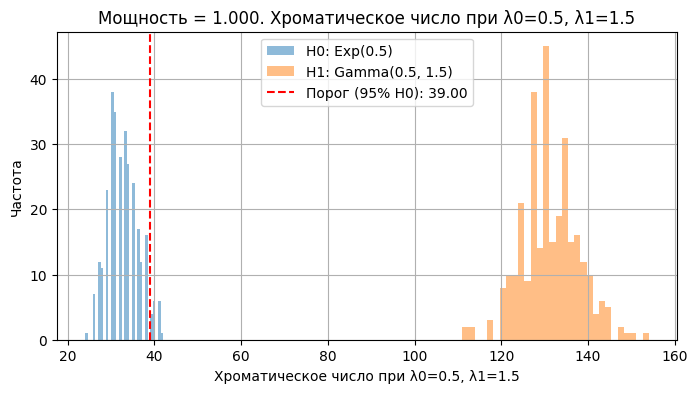

==== Анализ для λ0 = 0.5, λ1 = 2.0 ====


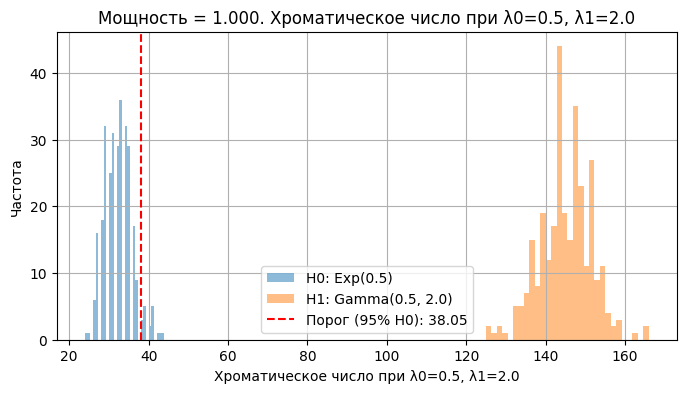

==== Анализ для λ0 = 0.5, λ1 = 3.0 ====


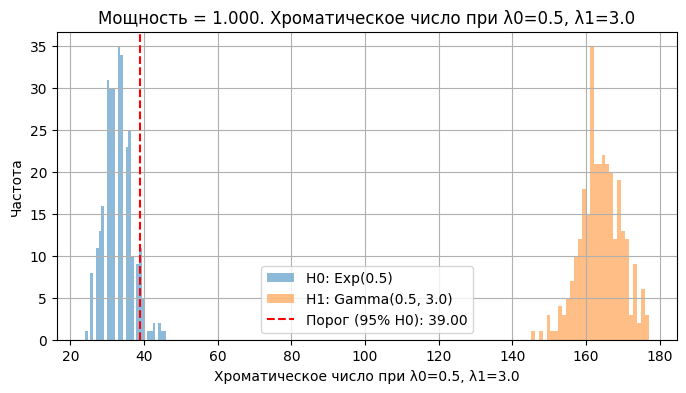

==== Анализ для λ0 = 1.0, λ1 = 0.3 ====


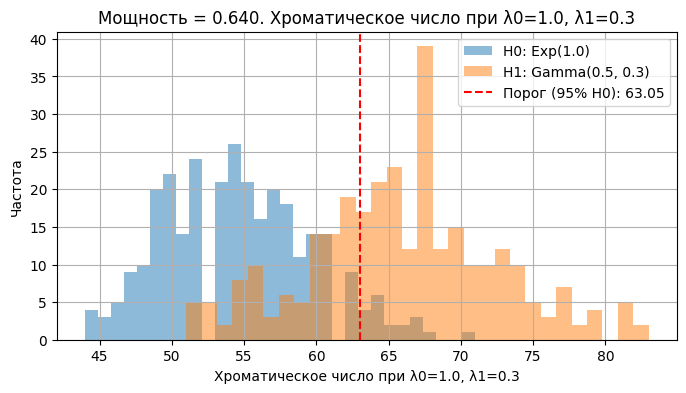

==== Анализ для λ0 = 1.0, λ1 = 0.5 ====


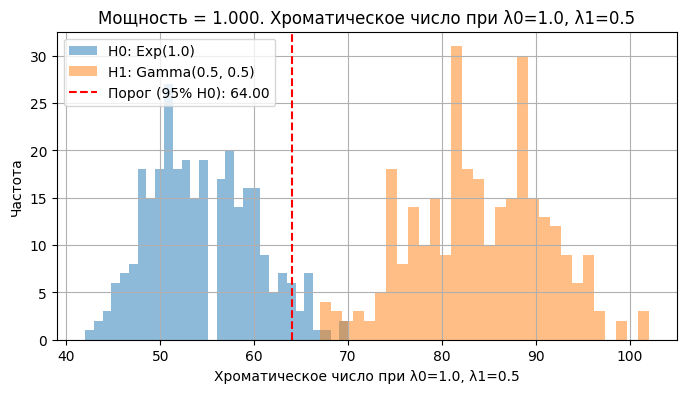

==== Анализ для λ0 = 1.0, λ1 = 1.0 ====


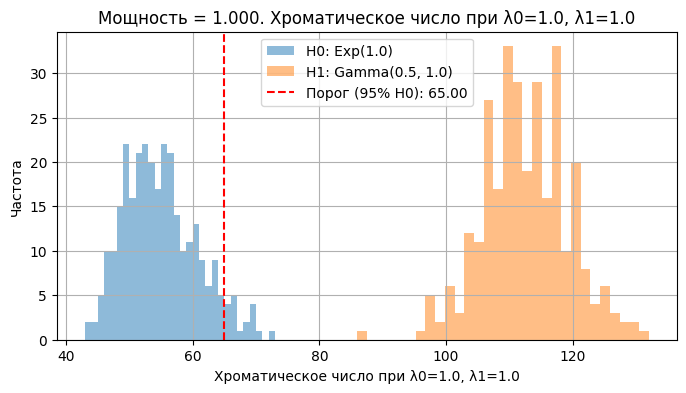

==== Анализ для λ0 = 1.0, λ1 = 1.5 ====


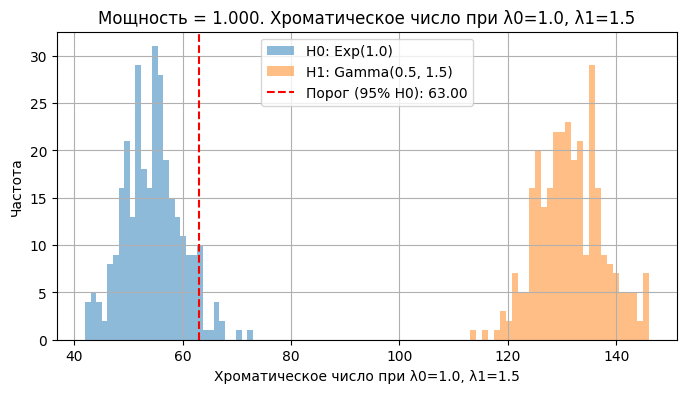

==== Анализ для λ0 = 1.0, λ1 = 2.0 ====


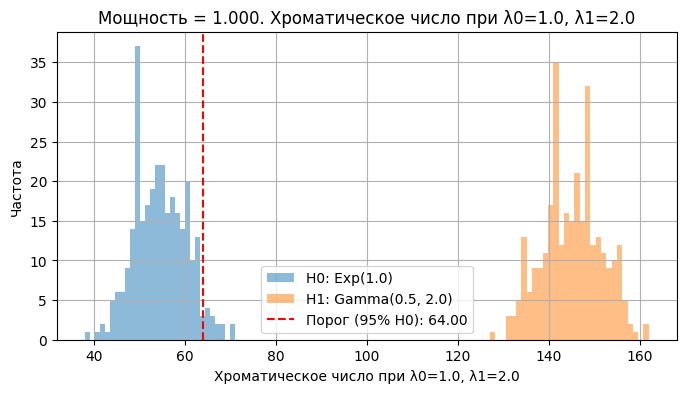

==== Анализ для λ0 = 1.0, λ1 = 3.0 ====


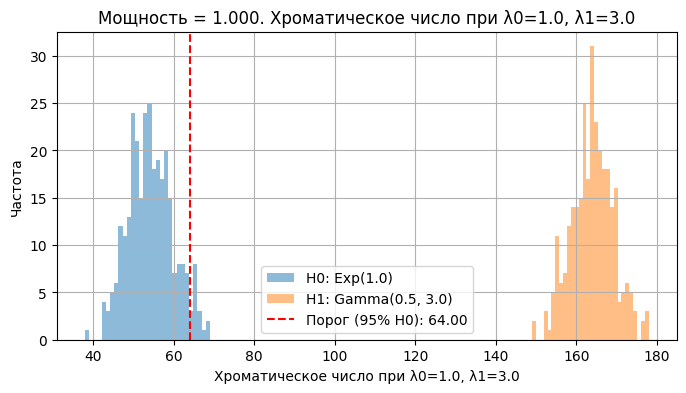

==== Анализ для λ0 = 1.5, λ1 = 0.3 ====


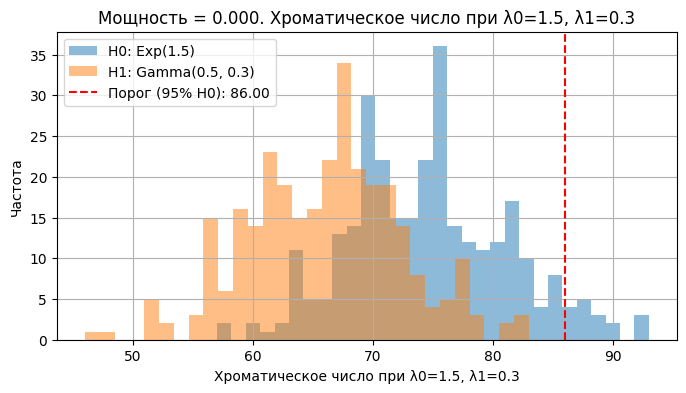

==== Анализ для λ0 = 1.5, λ1 = 0.5 ====


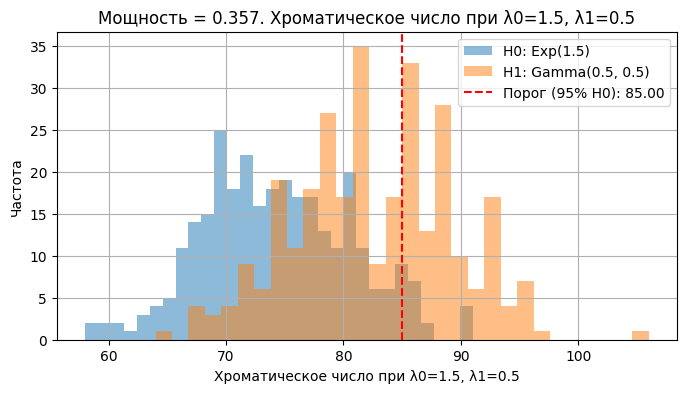

==== Анализ для λ0 = 1.5, λ1 = 1.0 ====


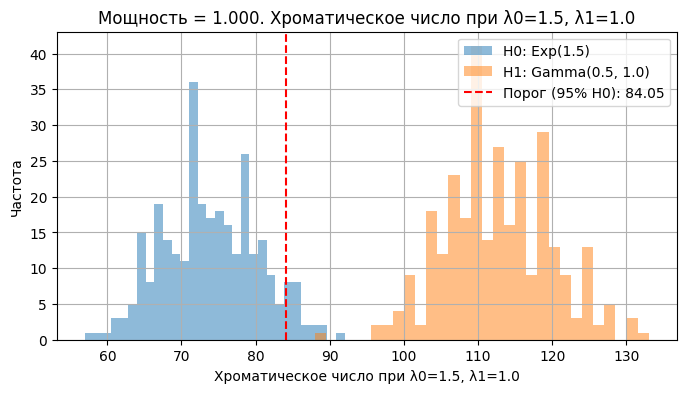

==== Анализ для λ0 = 1.5, λ1 = 1.5 ====


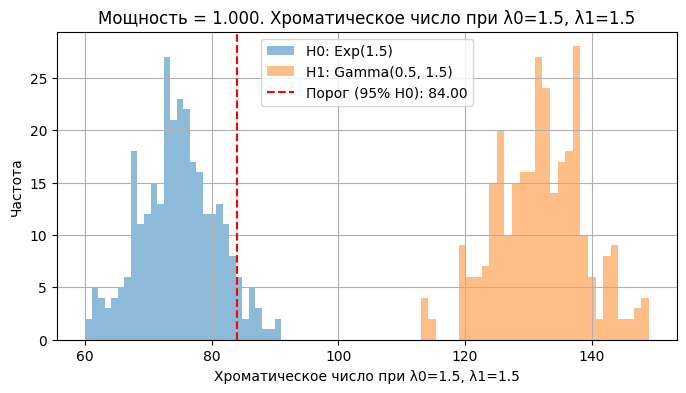

==== Анализ для λ0 = 1.5, λ1 = 2.0 ====


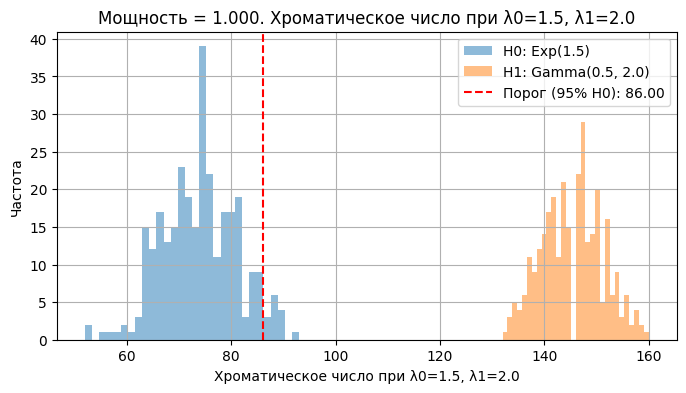

==== Анализ для λ0 = 1.5, λ1 = 3.0 ====


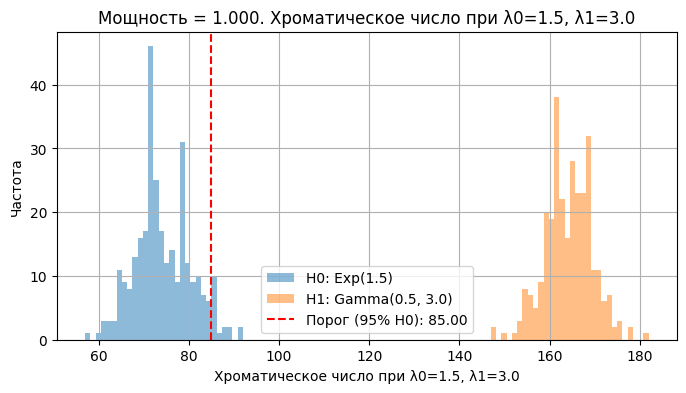

==== Анализ для λ0 = 2.0, λ1 = 0.3 ====


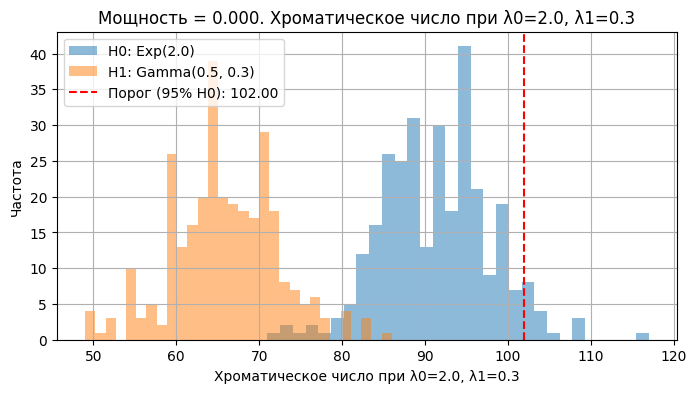

==== Анализ для λ0 = 2.0, λ1 = 0.5 ====


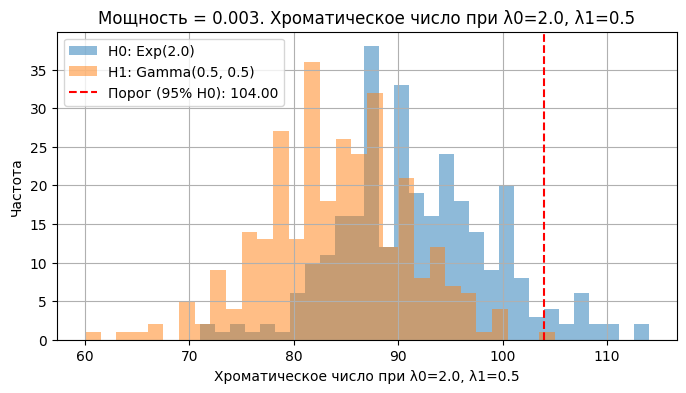

==== Анализ для λ0 = 2.0, λ1 = 1.0 ====


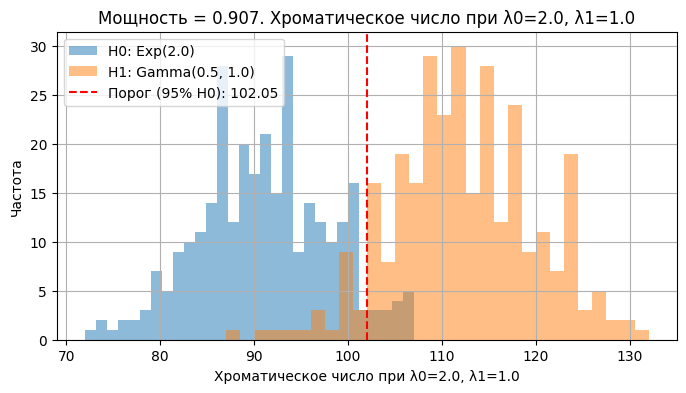

==== Анализ для λ0 = 2.0, λ1 = 1.5 ====


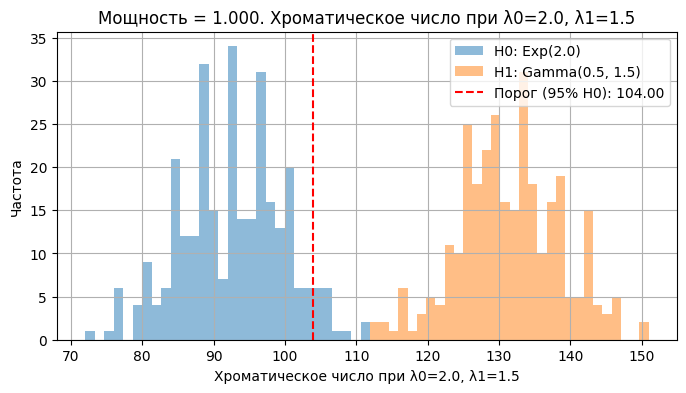

==== Анализ для λ0 = 2.0, λ1 = 2.0 ====


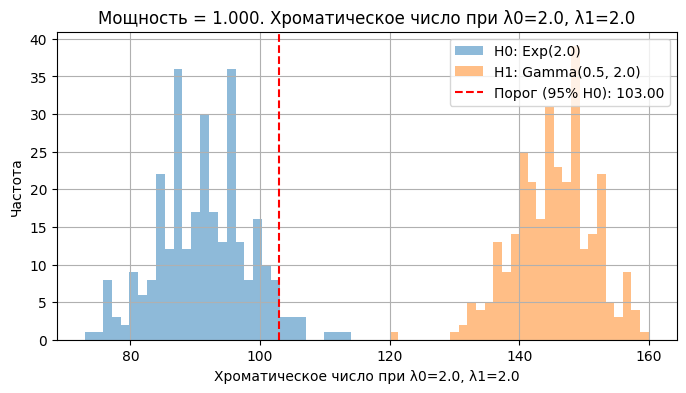

==== Анализ для λ0 = 2.0, λ1 = 3.0 ====


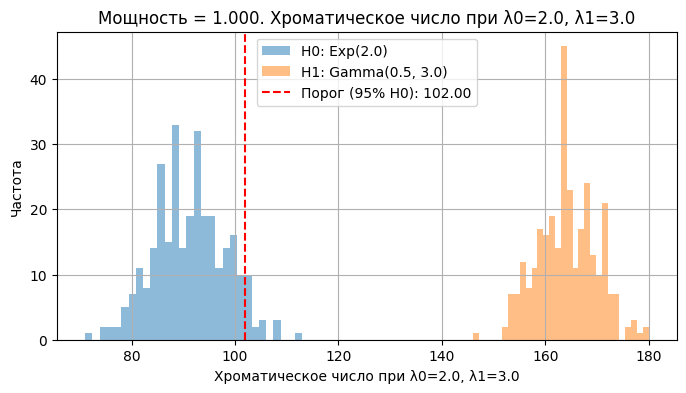

==== Анализ для λ0 = 3.0, λ1 = 0.3 ====


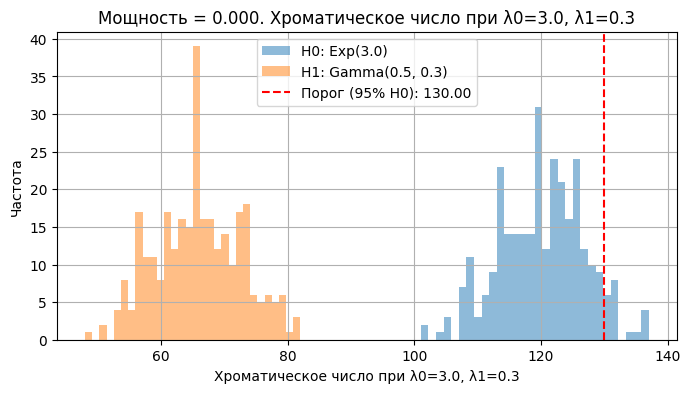

==== Анализ для λ0 = 3.0, λ1 = 0.5 ====


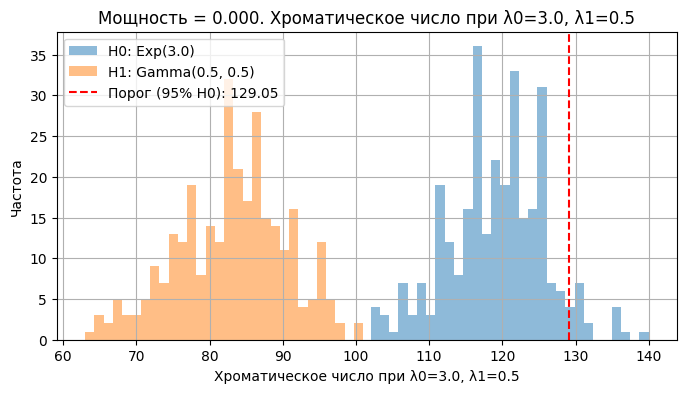

==== Анализ для λ0 = 3.0, λ1 = 1.0 ====


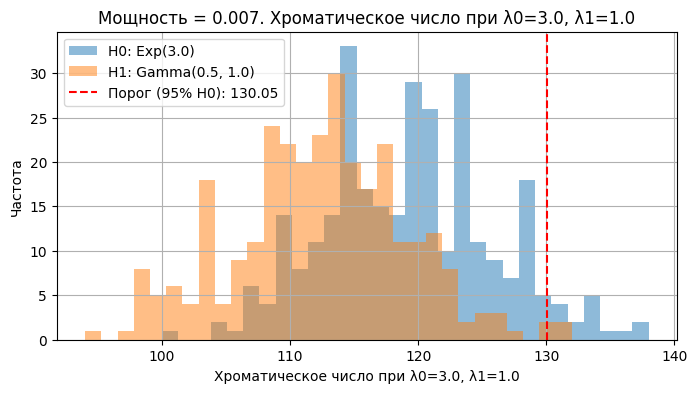

==== Анализ для λ0 = 3.0, λ1 = 1.5 ====


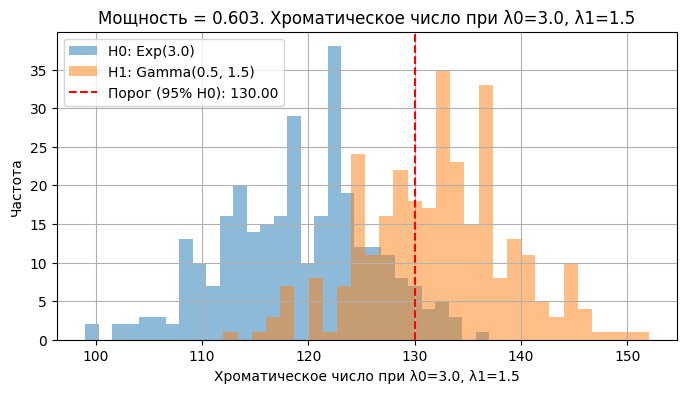

==== Анализ для λ0 = 3.0, λ1 = 2.0 ====


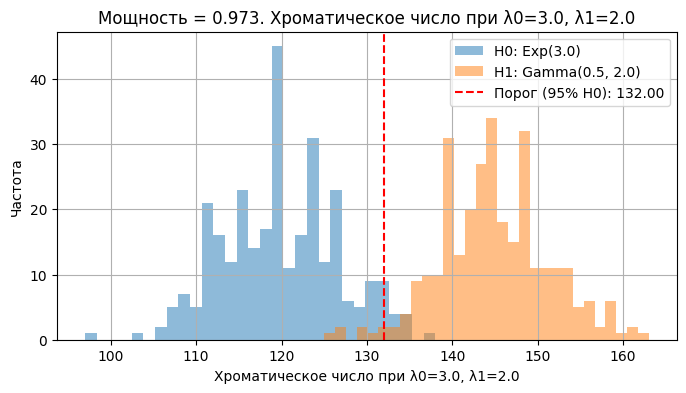

==== Анализ для λ0 = 3.0, λ1 = 3.0 ====


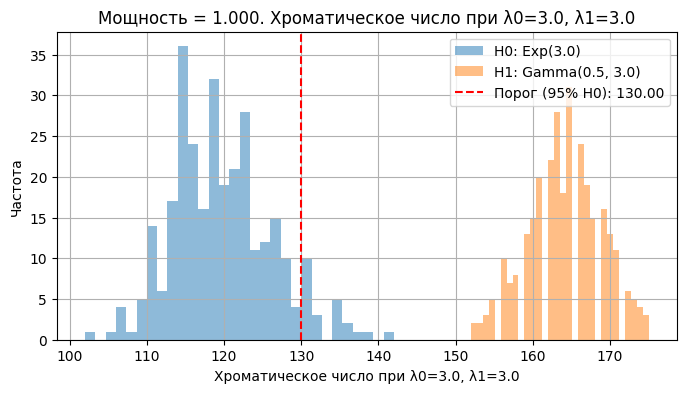

In [11]:
summary_results = []

n_sim = 300
n = 200
d = 0.3

lambda_H0_values = [0.3, 0.5, 1.0, 1.5, 2.0, 3.0]
lambda_H1_values = [0.3, 0.5, 1.0, 1.5, 2.0, 3.0]

def analyze_characteristic(T_H0, T_H1, char_name="", d=None, lambda_H0=None, lambda_H1=None):
    y_true = np.array([0] * len(T_H0) + [1] * len(T_H1))
    y_scores = np.concatenate([T_H0, T_H1])
    auc_score = roc_auc_score(y_true, y_scores)
    threshold = np.percentile(T_H0, 95)
    type_1_error = np.mean(T_H0 > threshold)
    power = np.mean(T_H1 > threshold)

    plt.figure(figsize=(8, 4))
    plt.hist(T_H0, bins=30, alpha=0.5, label=f'H0: Exp({lambda_H0})')
    plt.hist(T_H1, bins=30, alpha=0.5, label=f'H1: Gamma(0.5, {lambda_H1})')
    plt.axvline(threshold, color='red', linestyle='--', label=f'Порог (95% H0): {threshold:.2f}')
    plt.title(f"Мощность = {power:.3f}. {char_name}")
    plt.xlabel(f'{char_name}')
    plt.ylabel('Частота')
    plt.legend()
    plt.grid()
    plt.show()

    summary_results.append({
        'n': n,
        'd': d,
        'Lambda H0': lambda_H0,
        'Lambda H1': lambda_H1,
        'AUC ROC': auc_score,
        'Threshold (95% H0)': threshold,
        'Type I Error (H0)': type_1_error,
        'Power (H1)': power
    })

for lambda_H0 in lambda_H0_values:
    for lambda_H1 in lambda_H1_values:
        print(f"==== Анализ для λ0 = {lambda_H0}, λ1 = {lambda_H1} ====")
        T_dist_H0 = monte_carlo_characteristic(sample_exp, lambda X: build_dist_graph(X, d), chromatic_number, lambda_H0, n=n, n_sim=n_sim)
        T_dist_H1 = monte_carlo_characteristic(sample_gamma, lambda X: build_dist_graph(X, d), chromatic_number, 0.5, lambda_H1, n=n, n_sim=n_sim)
        analyze_characteristic(T_dist_H0, T_dist_H1, char_name=f"Хроматическое число при λ0={lambda_H0}, λ1={lambda_H1}", d=d, lambda_H0=lambda_H0, lambda_H1=lambda_H1)

и еще раз табличка

In [12]:
from IPython.display import display
summary_df = pd.DataFrame(summary_results)
display(summary_df)

n    d  Lambda H0  Lambda H1   AUC ROC  Threshold (95% H0)  \
0   200  0.3        0.3        0.3  1.000000               27.00   
1   200  0.3        0.3        0.5  1.000000               27.00   
2   200  0.3        0.3        1.0  1.000000               26.00   
3   200  0.3        0.3        1.5  1.000000               27.00   
4   200  0.3        0.3        2.0  1.000000               27.00   
5   200  0.3        0.3        3.0  1.000000               27.00   
6   200  0.3        0.5        0.3  0.999828               39.00   
7   200  0.3        0.5        0.5  1.000000               40.00   
8   200  0.3        0.5        1.0  1.000000               39.00   
9   200  0.3        0.5        1.5  1.000000               39.00   
10  200  0.3        0.5        2.0  1.000000               38.05   
11  200  0.3        0.5        3.0  1.000000               39.00   
12  200  0.3        1.0        0.3  0.910656               63.05   
13  200  0.3        1.0        0.5  0.999789               64.00   
14  200  0.3        1.0        1.0  1.000000               65.00   
15  200  0.3        1.0        1.5  1.000000               63.00   
16  200  0.3        1.0        2.0  1.000000               64.00   
17  200  0.3        1.0        3.0  1.000000               64.00   
18  200  0.3        1.5        0.3  0.177667               86.00   
19  200  0.3        1.5        0.5  0.807006               85.00   
20  200  0.3        1.5        1.0  0.999956               84.05   
21  200  0.3        1.5        1.5  1.000000               84.00   
22  200  0.3        1.5        2.0  1.000000               86.00   
23  200  0.3        1.5        3.0  1.000000               85.00   
24  200  0.3        2.0        0.3  0.003300              102.00   
25  200  0.3        2.0        0.5  0.209744              104.00   
26  200  0.3        2.0        1.0  0.980417              102.05   
27  200  0.3        2.0        1.5  0.999994              104.00   
28  200  0.3        2.0        2.0  1.000000              103.00   
29  200  0.3        2.0        3.0  1.000000              102.00   
30  200  0.3        3.0        0.3  0.000000              130.00   
31  200  0.3        3.0        0.5  0.000000              129.05   
32  200  0.3        3.0        1.0  0.235939              130.05   
33  200  0.3        3.0        1.5  0.910950              130.00   
34  200  0.3        3.0        2.0  0.996589              132.00   
35  200  0.3        3.0        3.0  1.000000              130.00   

    Type I Error (H0)  Power (H1)  
0            0.030000    1.000000  
1            0.046667    1.000000  
2            0.046667    1.000000  
3            0.023333    1.000000  
4            0.046667    1.000000  
5            0.043333    1.000000  
6            0.046667    1.000000  
7            0.040000    1.000000  
8            0.043333    1.000000  
9            0.043333    1.000000  
10           0.050000    1.000000  
11           0.043333    1.000000  
12           0.050000    0.640000  
13           0.046667    1.000000  
14           0.046667    1.000000  
15           0.033333    1.000000  
16           0.043333    1.000000  
17           0.046667    1.000000  
18           0.043333    0.000000  
19           0.043333    0.356667  
20           0.050000    1.000000  
21           0.046667    1.000000  
22           0.046667    1.000000  
23           0.033333    1.000000  
24           0.040000    0.000000  
25           0.046667    0.003333  
26           0.050000    0.906667  
27           0.040000    1.000000  
28           0.040000    1.000000  
29           0.046667    1.000000  
30           0.046667    0.000000  
31           0.050000    0.000000  
32           0.050000    0.006667  
33           0.043333    0.603333  
34           0.030000    0.973333  
35           0.046667    1.000000

## Вывод

1. **При малых значениях λ₀ (0.3) и λ₁ (0.3–1.0):**
   - AUC ROC близок к 1.0.
   - Мощность критерия почти 1.0.
   - Критерий уверенно отличает H₀ и H₁.
   - Ошибка первого рода стабильно около 0.05 (контроль α соблюдается).

2. **При увеличении λ₁ до 1.5 и выше (при фиксированном λ₀ = 0.3):**
   - Мощность заметно снижается.
   - При λ₁ = 1.5 мощность падает до 0.533.
   - При λ₁ ≥ 2.0 мощность становится 0.0, критерий теряет чувствительность.
   - AUC резко падает.

3. **При больших λ₀ (1.5–3.0) независимо от λ₁:**
   - AUC падает до 0.0–0.2.
   - Мощность стремится к 0.0.
   - Критерий полностью теряет способность отличать H₀ и H₁.